#  Evolvability of Population metric for Genetic Algorithm
This notebook contains a representation of the results presented in the article: [Population Evolvability: Dynamic Fitness Landscape Analysis for Population-Based Metaheuristic Algorithms](https://ieeexplore.ieee.org/document/8016373) for metrics:
- *Evolutionary Probability of Population*
- *Evolutionary Ability of Population*
- *Evolvability of Population*

The algorithm used is Genetic Algorithm for six functions:
- *Sphere*
- *Schwefel*
- *Radar*
- *Rastrigin*
- *Step Ellipsoidal*
- *Bent Cigar*

## Imports

In [1]:
import pandas as pd
from cma import bbobbenchmarks as bn
from ioh import ProblemClass, get_problem

from evp.algos.GA import GeneticAlgorithm
from evp.algos.cmaes import CMAES
from evp.evaluator import EvolvabilityOfPopulationEvaluator
from evp.funcs.radar import radar_function
from evp.strategy import EvolvabilityOfPopulationStrategy
from notebooks.utils import calculate_evaluator_score, plot_function

## Initialize algorithms
To initialize algorithm we will set according to information in the article. For GA, it is:
- dimension = 30
- population size = 100
- lower and upper bound = [-100, 100]
- mutation rate = 0.05
- crossover rate = 0.8
- elite rate = 0.05


In [2]:
dim_ = 30
lb_, ub_ = -100, 100
pop_size_ = 100
mutation_rate = 0.05
crossover_rate = 0.8
elite_rate = 0.05

For each function we set metric parameters:
- max functions evaluations = 1e4 * 30 / 25
- number of neighbours = 5

In [3]:
maxFEs_ = int(1e4 * 30 / 25)
nNeighbours_ = 5

## Sphere function


In [4]:
f1 = bn.F1(zerof=True, zerox=True)

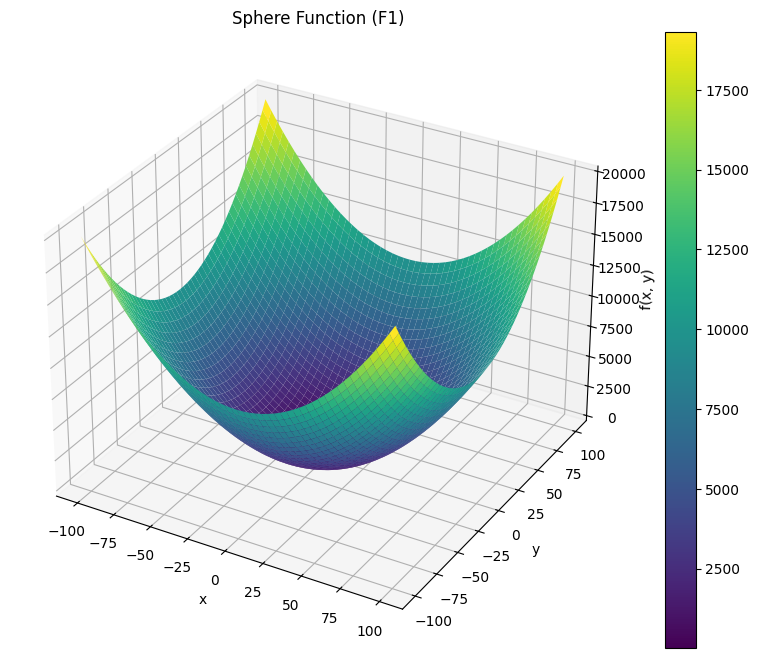

In [5]:
plot_function('Sphere Function (F1)', f1, lb_, ub_)

### Evaluator
In this approach we use standard version of GA to optimize problem solution

In [6]:
ga = GeneticAlgorithm(f1, dim_, mutation_rate, crossover_rate, elite_rate, [lb_, ub_], pop_size_)
evp_evaluator_for_f1 = EvolvabilityOfPopulationEvaluator(ga, maxFEs_, nNeighbours_)

100%|██████████| 120/120 [00:02<00:00, 58.08it/s]


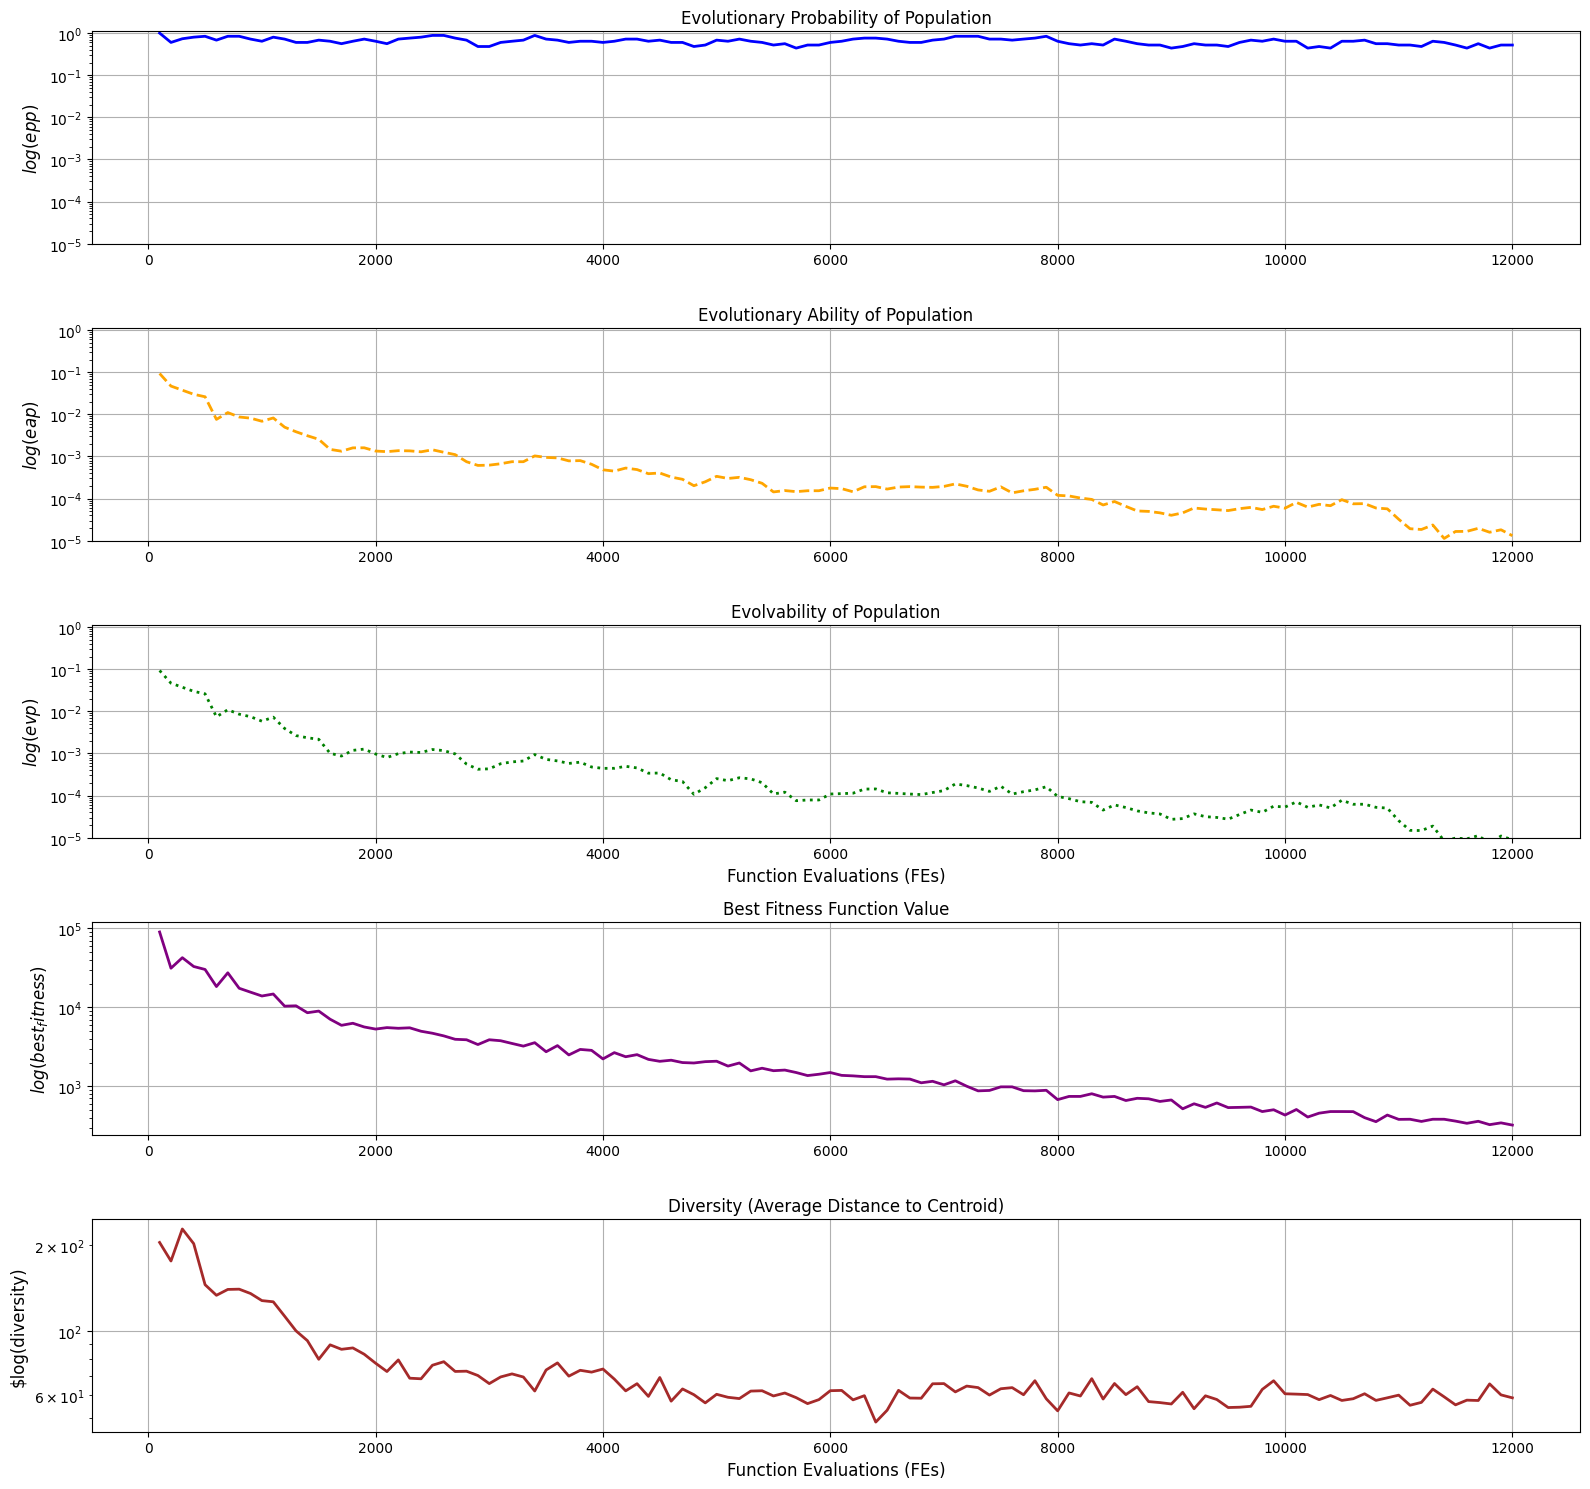

In [7]:
evp_evaluator_for_f1.evaluate(with_plot=True)

#### Parent with neighbours visualizations

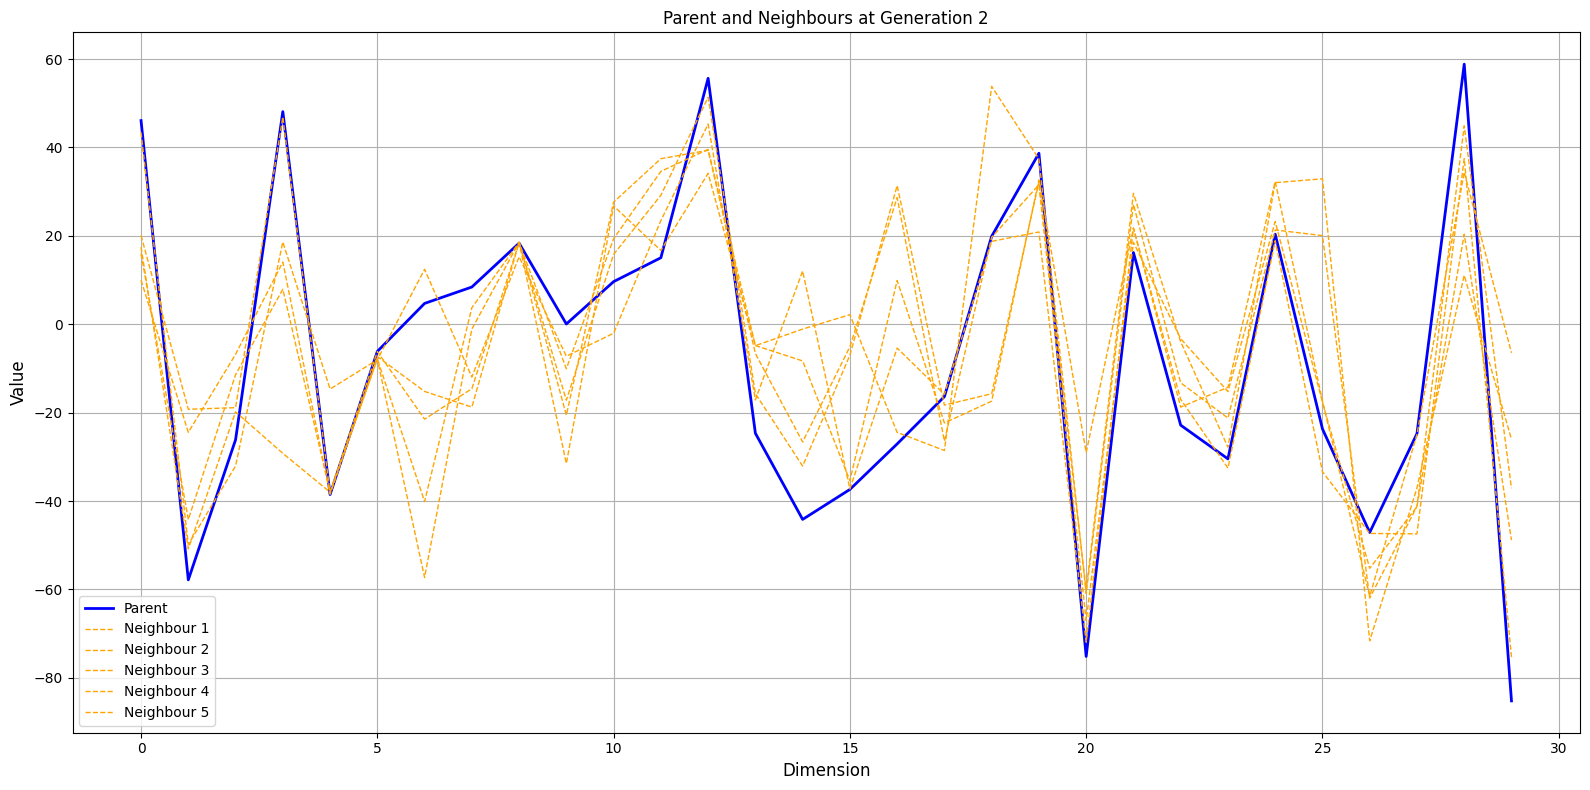

In [8]:
evp_evaluator_for_f1.plot_neighbours_parallel(2)

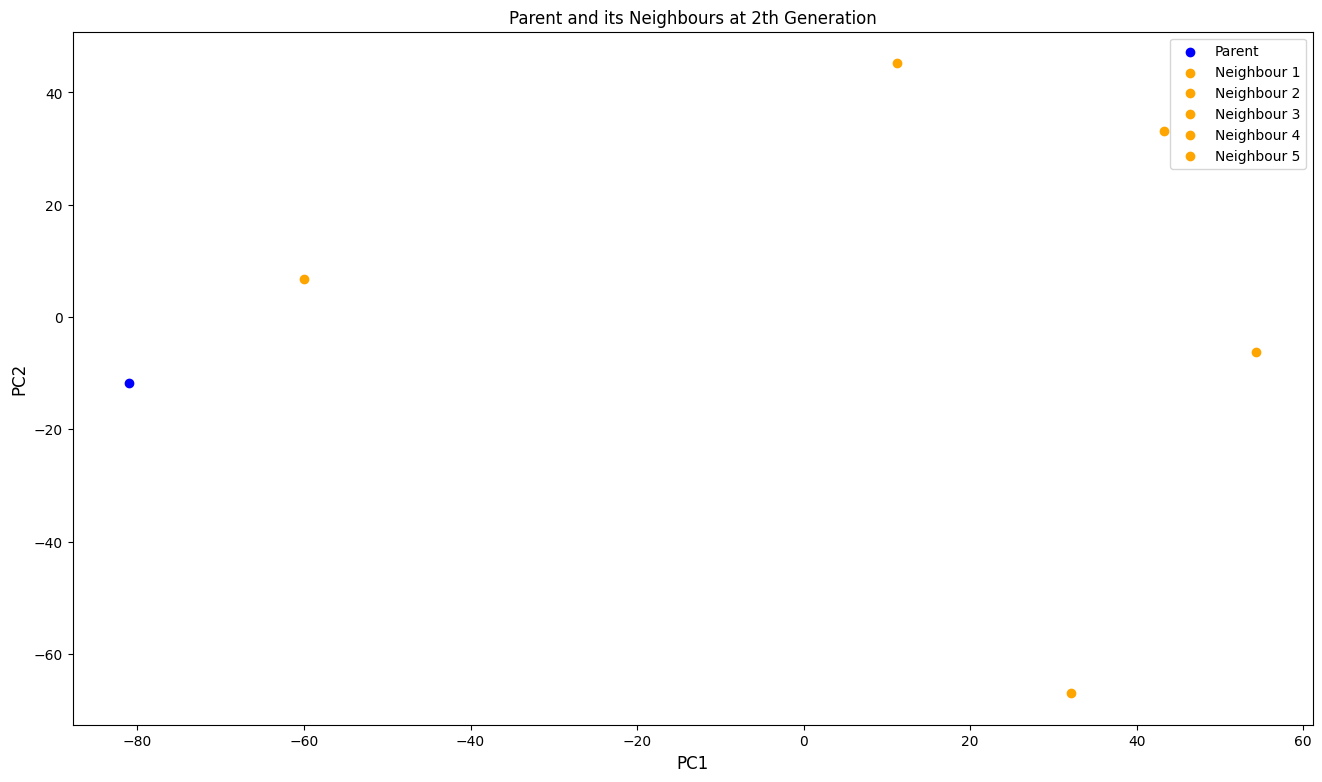

In [9]:
evp_evaluator_for_f1.plot_neighbours_dimensional(2)

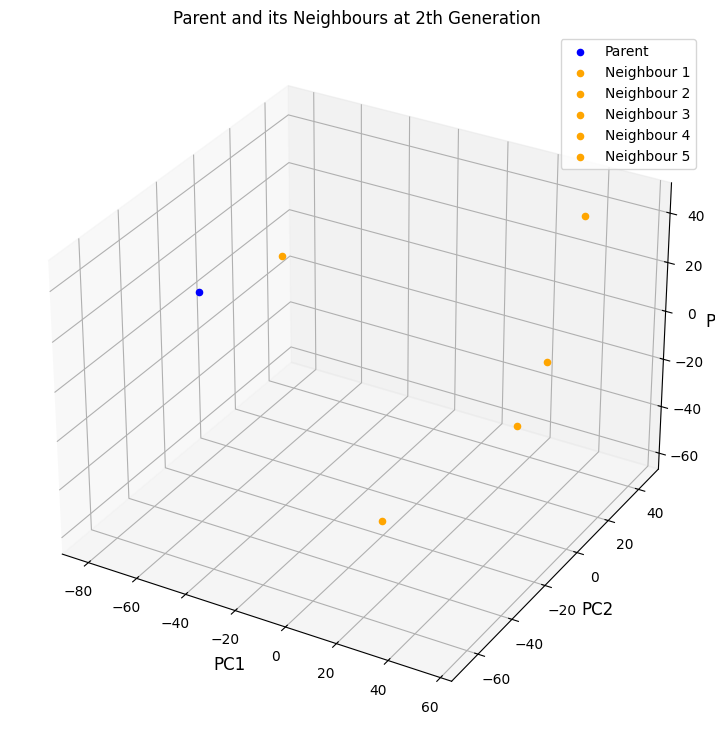

In [10]:
evp_evaluator_for_f1.plot_neighbours_dimensional(2, 3)

#### Score

In [11]:
def get_evaluator():
    ga = GeneticAlgorithm(f1, dim_, mutation_rate, crossover_rate, elite_rate, [lb_, ub_], pop_size_)
    return EvolvabilityOfPopulationEvaluator(ga, maxFEs_, nNeighbours_)

In [12]:
evaluator_score_for_f1 = calculate_evaluator_score(get_evaluator)

100%|██████████| 120/120 [00:01<00:00, 61.22it/s]


In [13]:
evaluator_score_for_f1

best_fitness  mean_best_fitness  std_best_fitness  mean_convergence_speed  \
0     235.13831         341.839431         65.871572                 12000.0   

   std_convergence_speed  
0                    0.0

### Strategy
We can enable detecting changes in the evp metric values using Kolmogorov-Smirnov Windowing method. If drifts is detected, algorithm is restarted.


In [14]:
ga = GeneticAlgorithm(f1, dim_, mutation_rate, crossover_rate, elite_rate, [lb_, ub_], pop_size_)
evp_strategy_for_f1 = EvolvabilityOfPopulationStrategy(ga, maxFEs_, nNeighbours_)

In [15]:
evp_strategy_for_f1.evaluate()

100%|██████████| 120/120 [00:02<00:00, 53.47it/s]


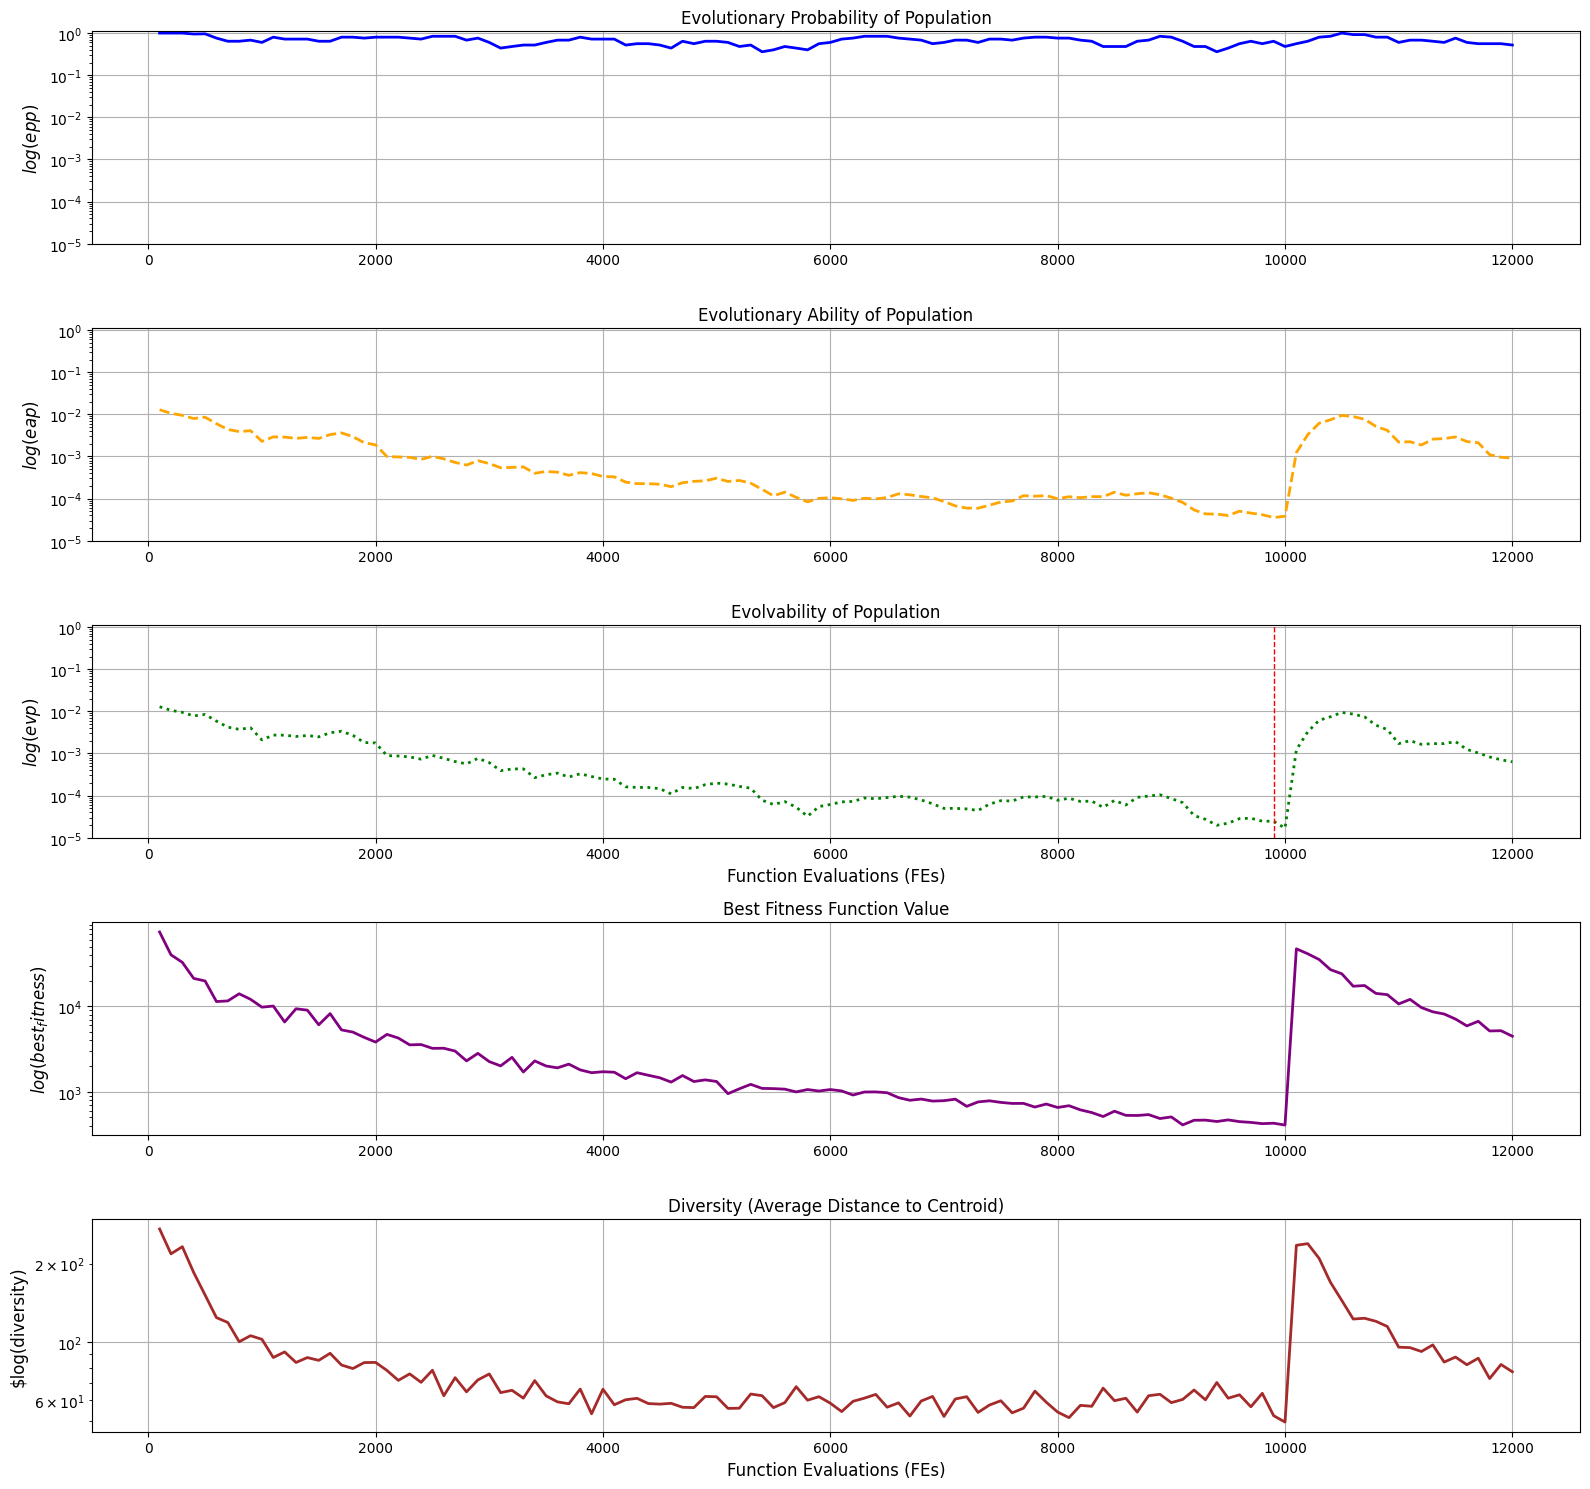

In [16]:
evp_strategy_for_f1.plot_metrics()

#### Score

In [17]:
strategy_score_for_f1 = evp_strategy_for_f1.score()

In [18]:
strategy_score_for_f1

best_fitness  mean_best_fitness  std_best_fitness  \
0    408.510975         408.510975               0.0   

   mean_functions_evaluations  std_functions_evaluations  
0                      9900.0                        0.0

## Schwefel’s function

In [19]:
f20 = bn.F20()

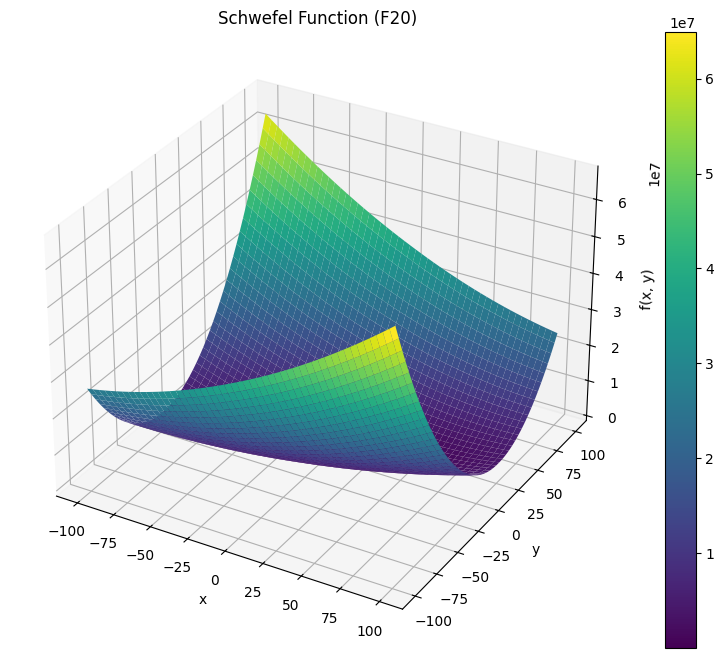

In [20]:
plot_function('Schwefel Function (F20)', f20, lb_, ub_)

### Evaluator

In [21]:
ga = GeneticAlgorithm(f1, dim_, mutation_rate, crossover_rate, elite_rate, [lb_, ub_], pop_size_)
evp_evaluator_for_f20 = EvolvabilityOfPopulationEvaluator(ga, maxFEs_, nNeighbours_)

100%|██████████| 120/120 [00:02<00:00, 58.17it/s]


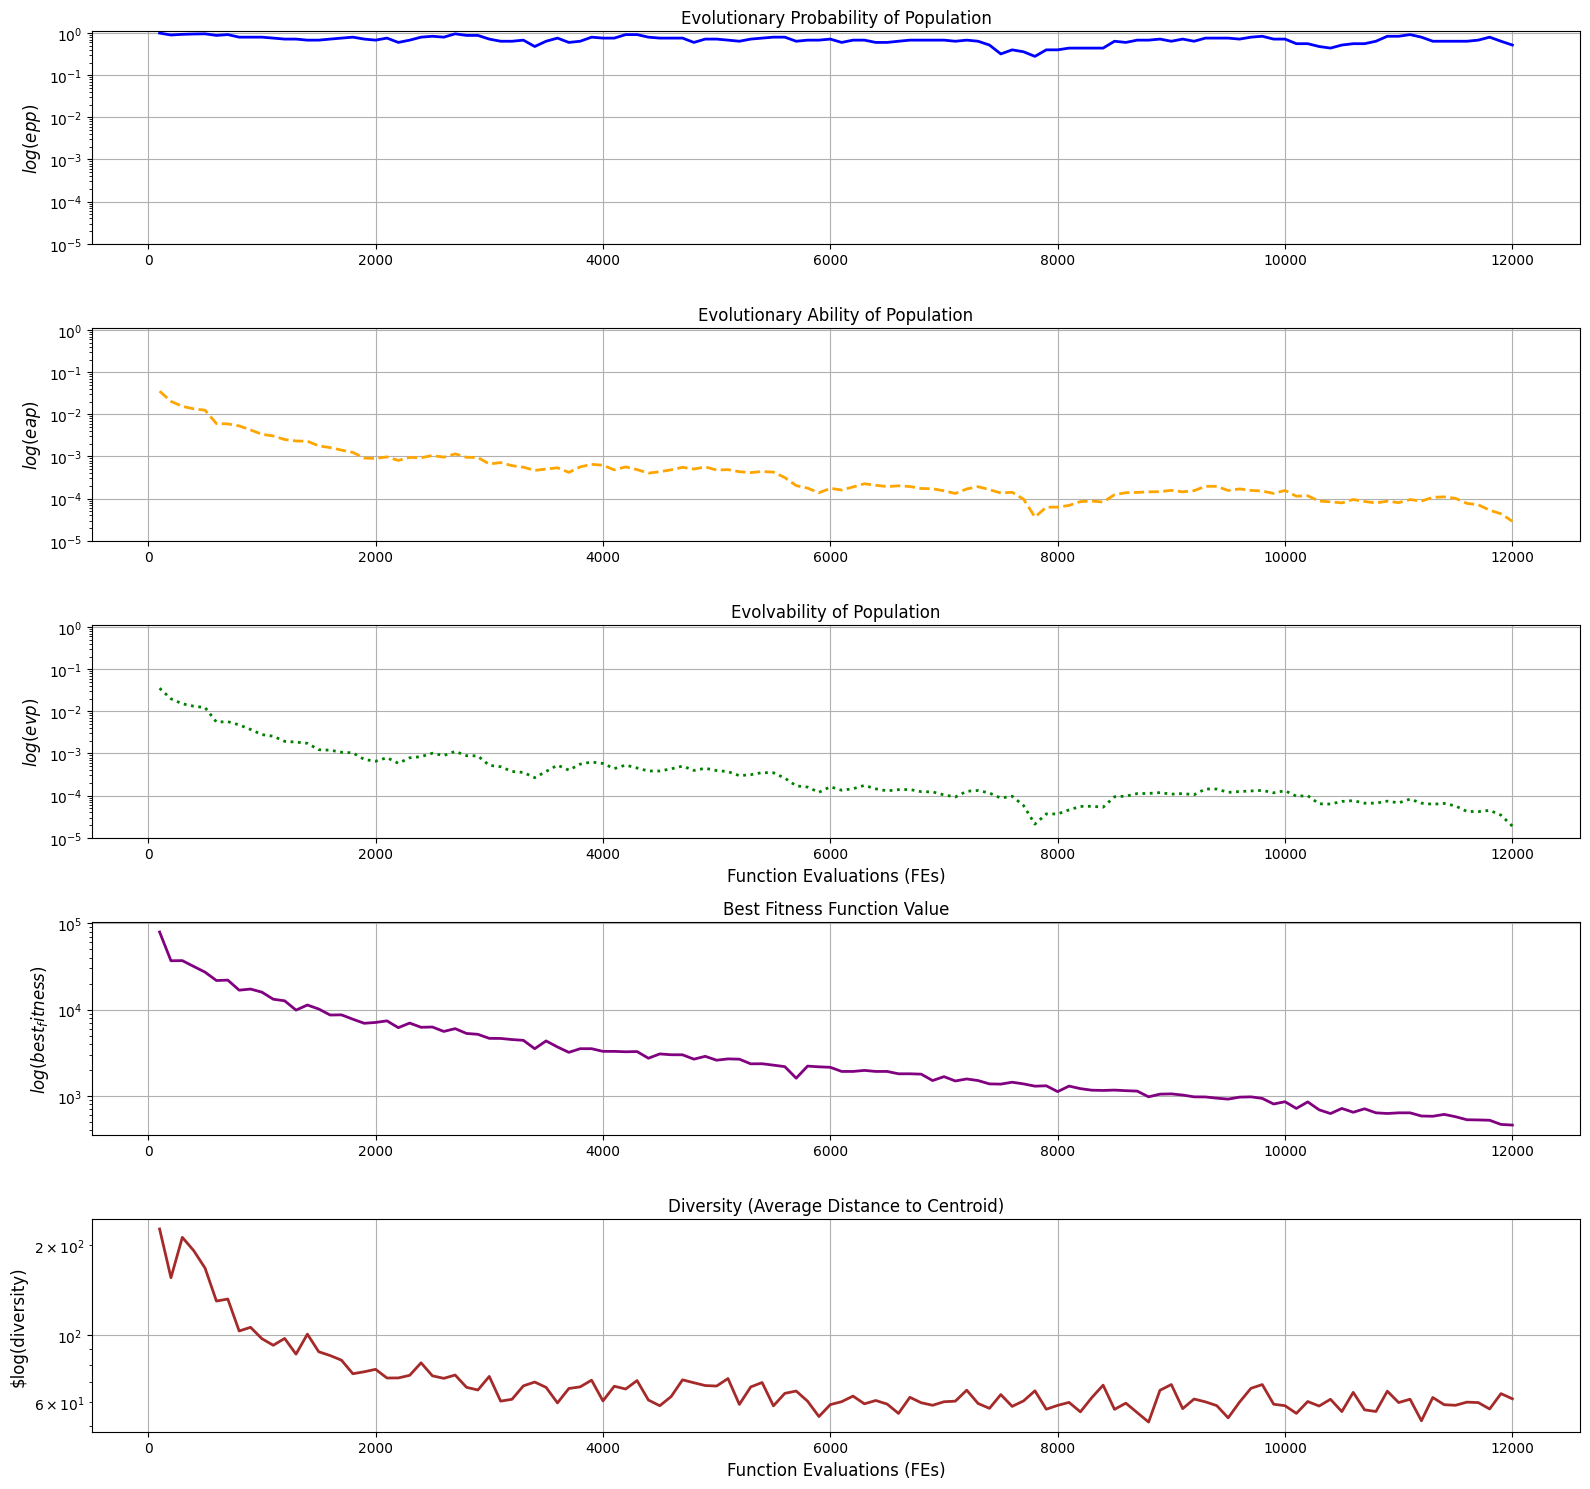

In [22]:
evp_evaluator_for_f20.evaluate(with_plot=True)

#### Score

In [23]:
def get_evaluator():
    ga = GeneticAlgorithm(f1, dim_, mutation_rate, crossover_rate, elite_rate, [lb_, ub_], pop_size_)
    return EvolvabilityOfPopulationEvaluator(ga, maxFEs_, nNeighbours_)

In [24]:
evaluator_score_for_f20 = calculate_evaluator_score(get_evaluator)

100%|██████████| 120/120 [00:02<00:00, 59.51it/s]


In [25]:
evaluator_score_for_f20

best_fitness  mean_best_fitness  std_best_fitness  mean_convergence_speed  \
0    240.905975         364.326843         89.306394                 12000.0   

   std_convergence_speed  
0                    0.0

### Strategy

In [27]:
ga = GeneticAlgorithm(f1, dim_, mutation_rate, crossover_rate, elite_rate, [lb_, ub_], pop_size_)
evp_strategy_for_f20 = EvolvabilityOfPopulationStrategy(ga, maxFEs_, nNeighbours_)

In [28]:
evp_strategy_for_f20.evaluate()

100%|██████████| 120/120 [00:02<00:00, 53.46it/s]


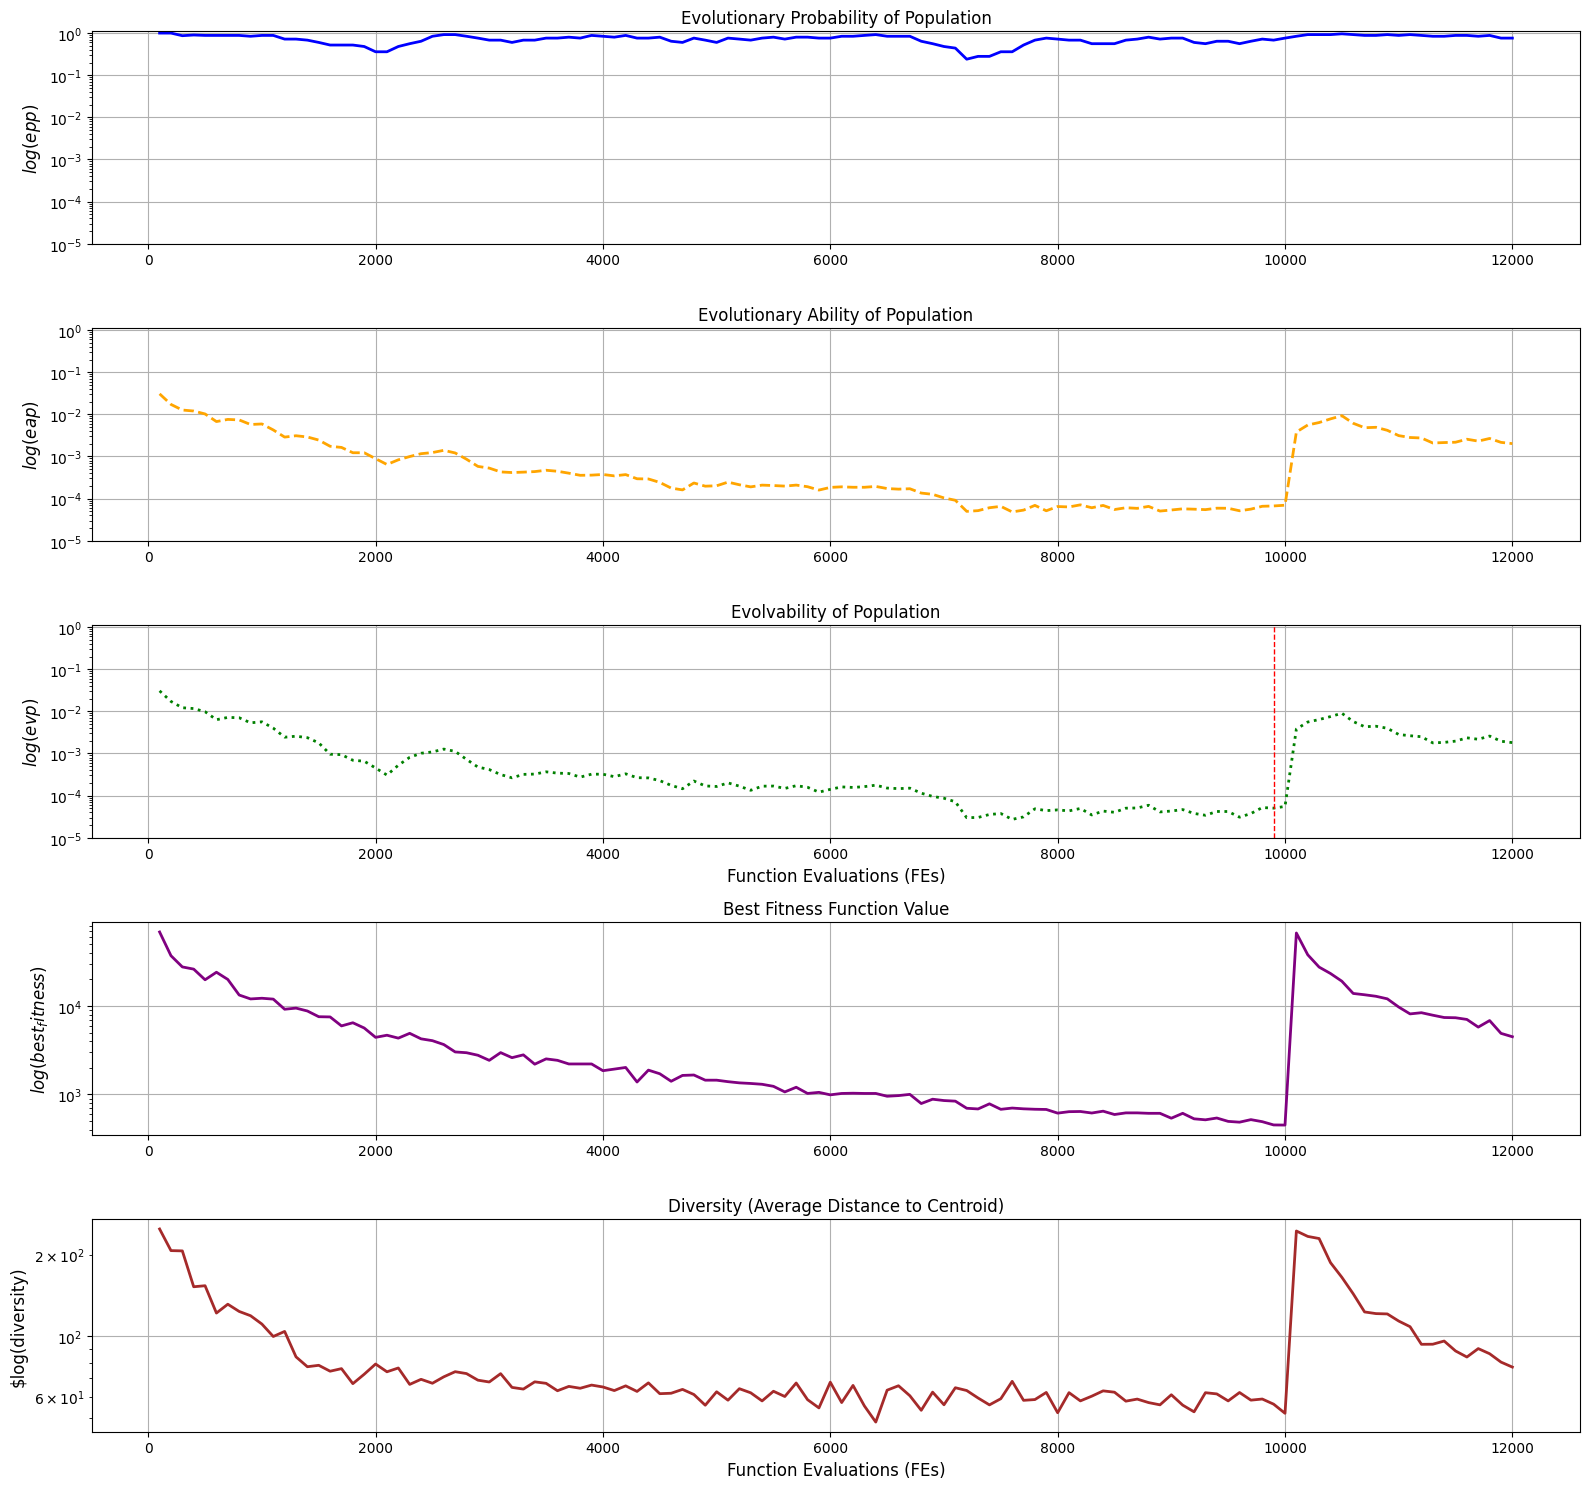

In [29]:
evp_strategy_for_f20.plot_metrics()

#### Score

In [30]:
strategy_score_for_f20 = evp_strategy_for_f20.score()

In [31]:
strategy_score_for_f20

best_fitness  mean_best_fitness  std_best_fitness  \
0    452.823727         452.823727               0.0   

   mean_functions_evaluations  std_functions_evaluations  
0                      9900.0                        0.0

## Radar function

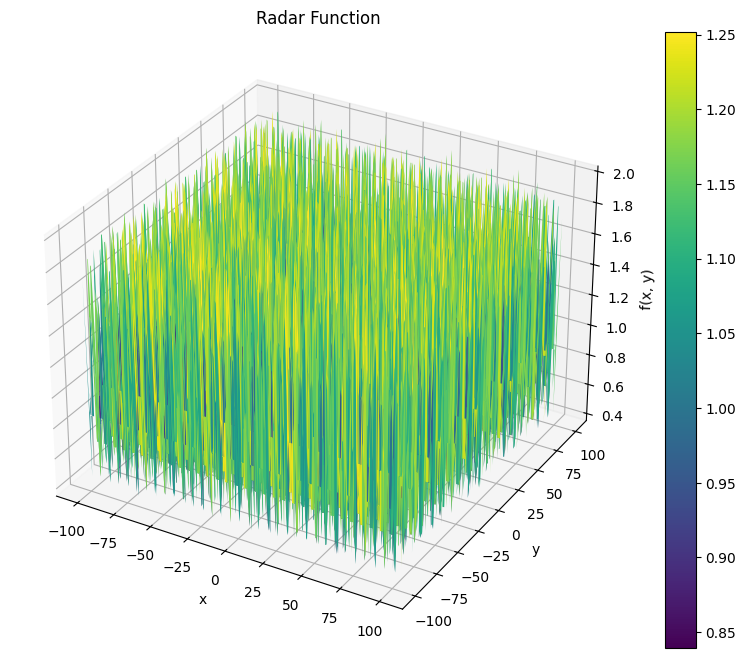

In [32]:
plot_function('Radar Function', radar_function, lb_, ub_)

### Evaluator

In [33]:
ga = GeneticAlgorithm(f1, dim_, mutation_rate, crossover_rate, elite_rate, [lb_, ub_], pop_size_)
evp_evaluator_for_radar = EvolvabilityOfPopulationEvaluator(ga, maxFEs_, nNeighbours_)

100%|██████████| 120/120 [00:02<00:00, 59.27it/s]


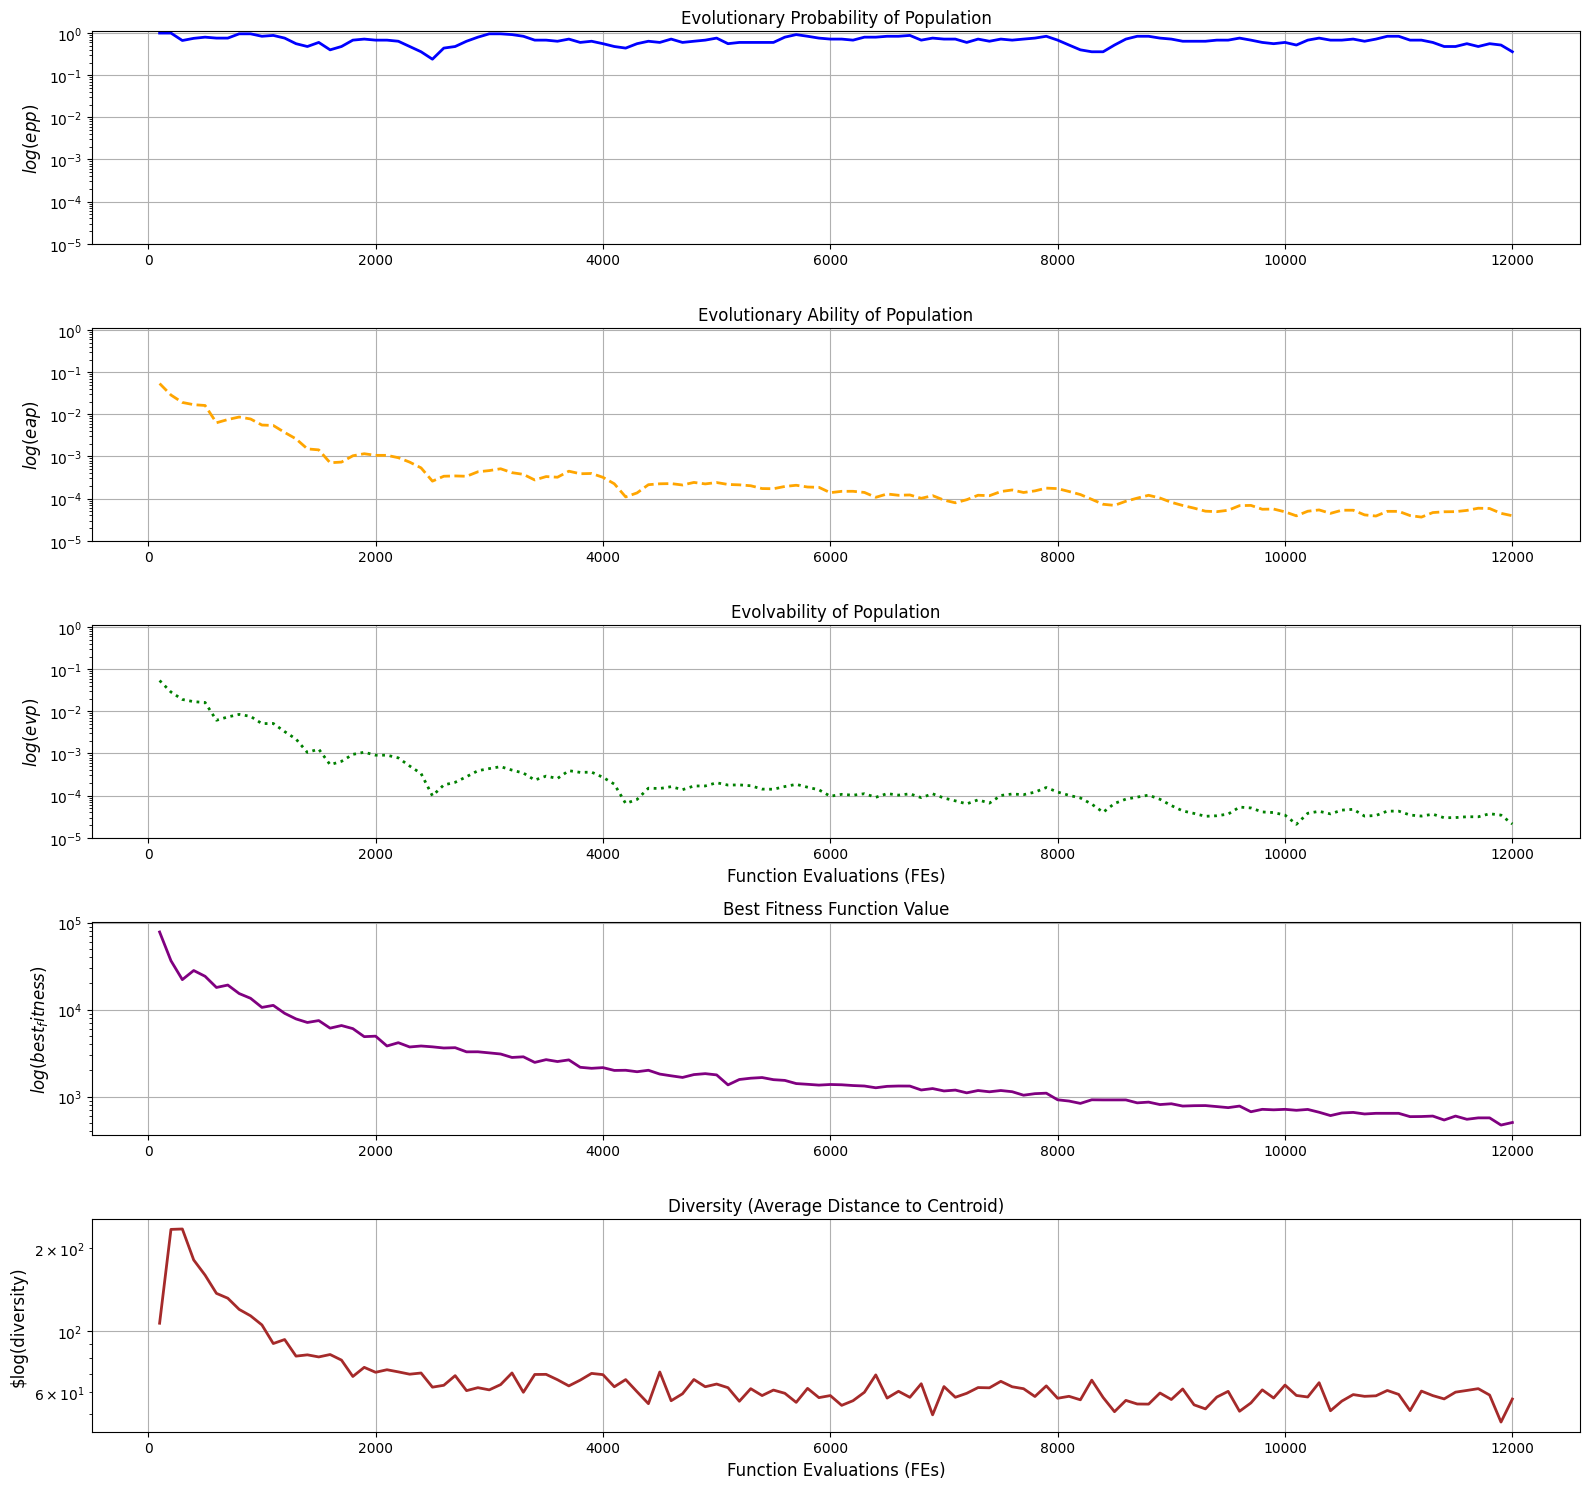

In [34]:
evp_evaluator_for_radar.evaluate(with_plot=True)

#### Score

In [35]:
def get_evaluator():
    ga = GeneticAlgorithm(f1, dim_, mutation_rate, crossover_rate, elite_rate, [lb_, ub_], pop_size_)
    return EvolvabilityOfPopulationEvaluator(ga, maxFEs_, nNeighbours_)

In [36]:
evaluator_score_for_radar = calculate_evaluator_score(get_evaluator)

100%|██████████| 120/120 [00:02<00:00, 57.63it/s]


In [37]:
evaluator_score_for_radar

best_fitness  mean_best_fitness  std_best_fitness  mean_convergence_speed  \
0    322.895444         345.128539         17.351705                 12000.0   

   std_convergence_speed  
0                    0.0

### Strategy

In [40]:
ga = GeneticAlgorithm(f1, dim_, mutation_rate, crossover_rate, elite_rate, [lb_, ub_], pop_size_)
evp_strategy_for_radar = EvolvabilityOfPopulationStrategy(ga, maxFEs_, nNeighbours_)

In [41]:
evp_strategy_for_radar.evaluate()

100%|██████████| 120/120 [00:02<00:00, 56.81it/s]


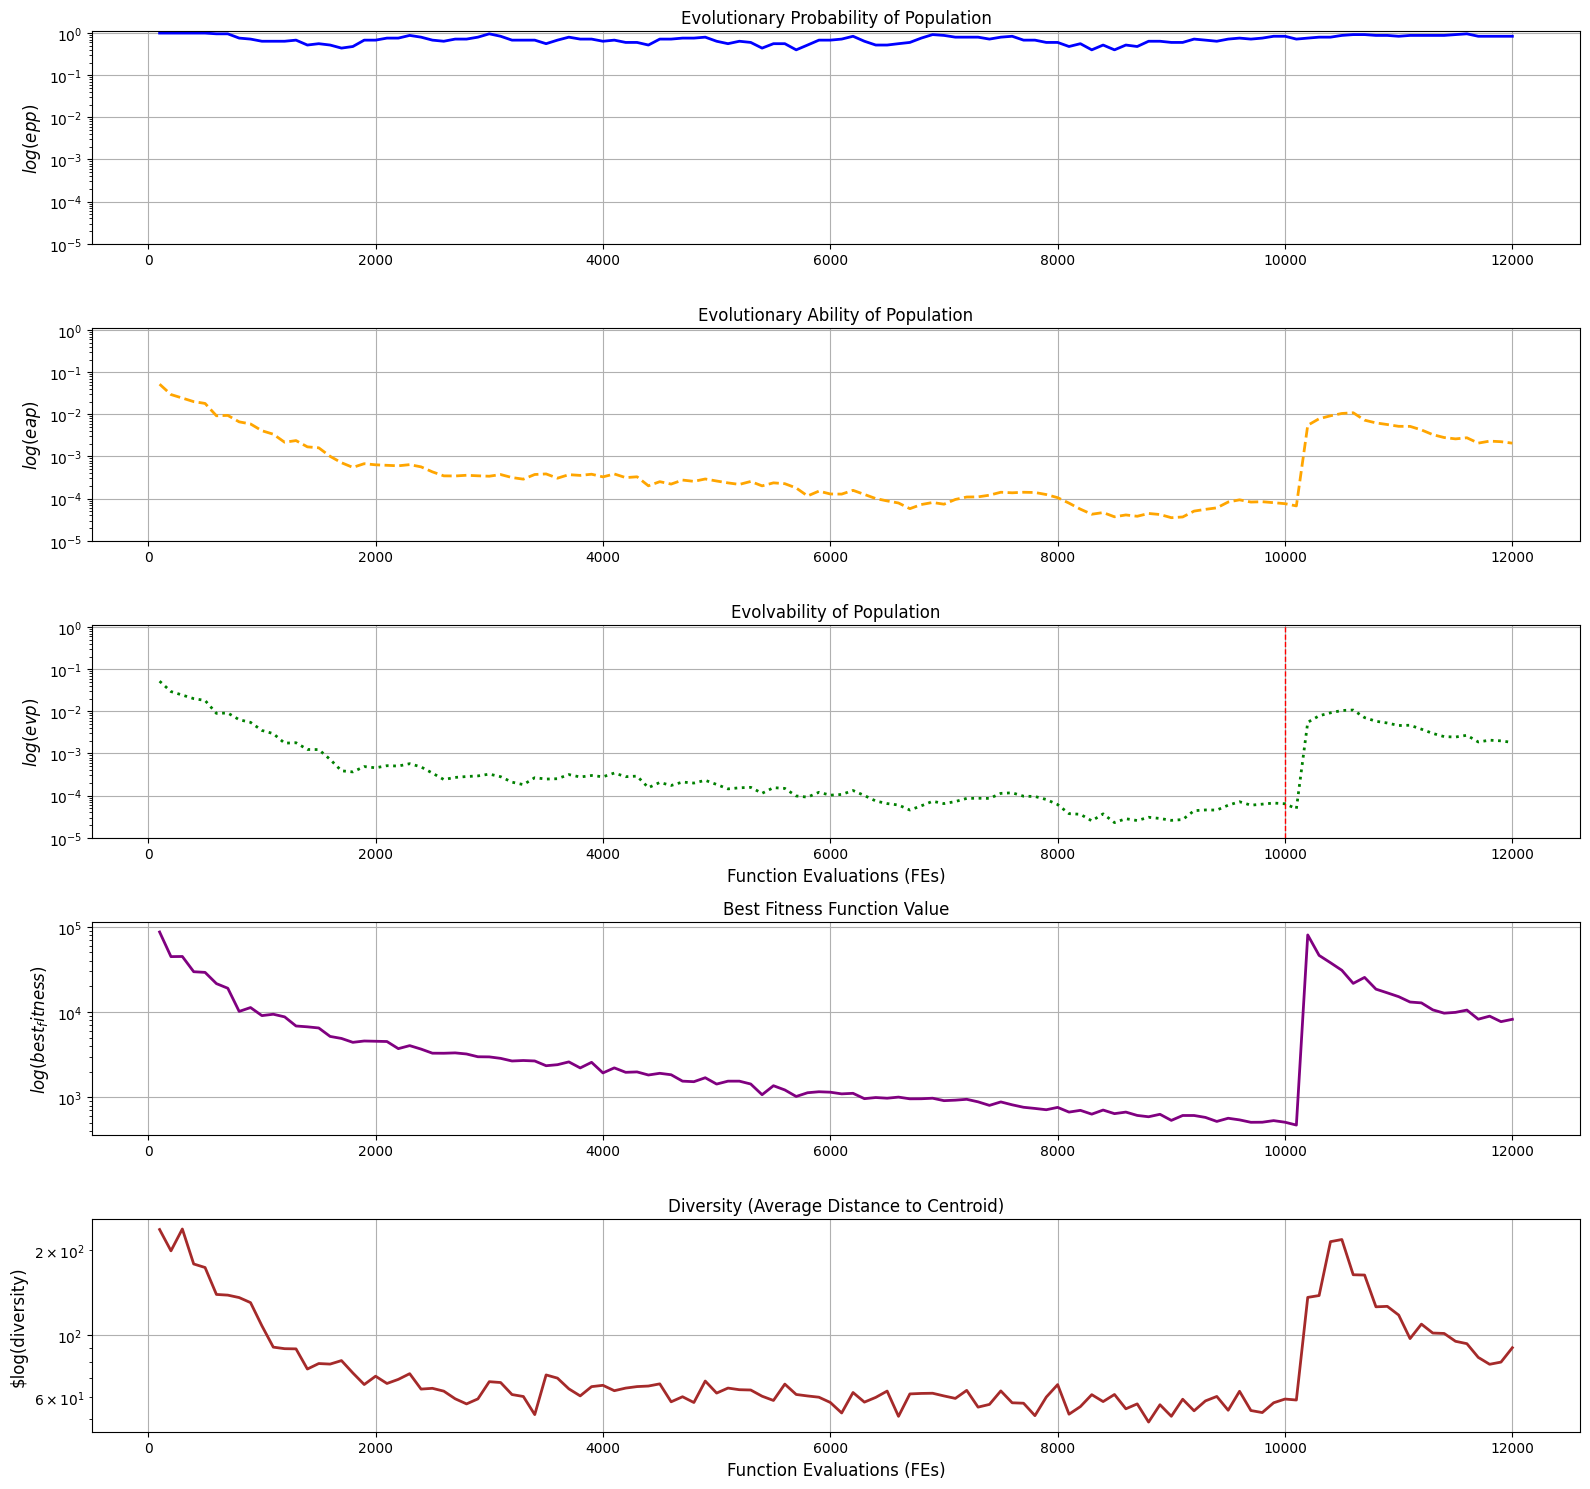

In [42]:
evp_strategy_for_radar.plot_metrics()

#### Score

In [43]:
strategy_score_for_radar = evp_strategy_for_radar.score()

In [44]:
strategy_score_for_radar

best_fitness  mean_best_fitness  std_best_fitness  \
0    509.030786         509.030786               0.0   

   mean_functions_evaluations  std_functions_evaluations  
0                     10000.0                        0.0

## Rastrigin function

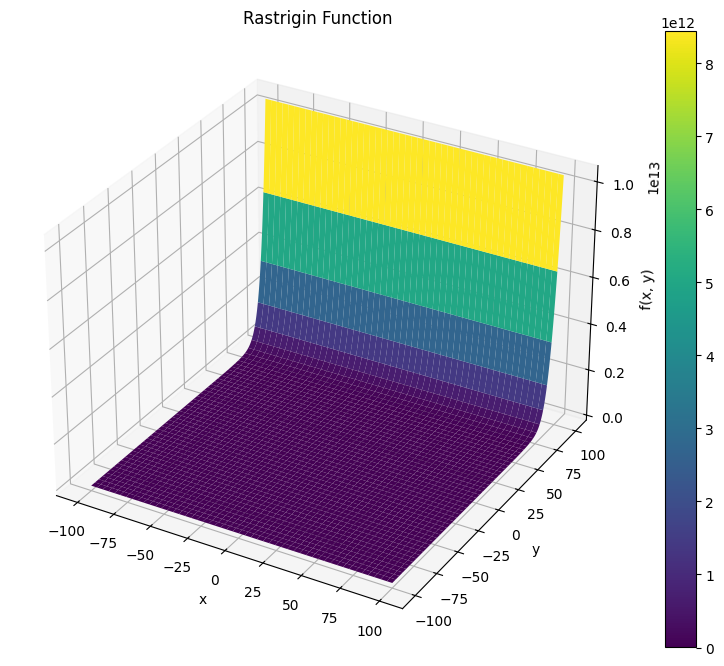

In [45]:
plot_function('Rastrigin Function', get_problem(3, 2, 2, ProblemClass.BBOB), lb_, ub_)

In [46]:
def f3(x):
    problem = get_problem(3, 1, 30, ProblemClass.BBOB)
    return problem(x)

### Evaluator

In [47]:
ga = GeneticAlgorithm(f1, dim_, mutation_rate, crossover_rate, elite_rate, [lb_, ub_], pop_size_)
evp_evaluator_for_f3 = EvolvabilityOfPopulationEvaluator(ga, maxFEs_, nNeighbours_)

100%|██████████| 120/120 [00:02<00:00, 58.28it/s]


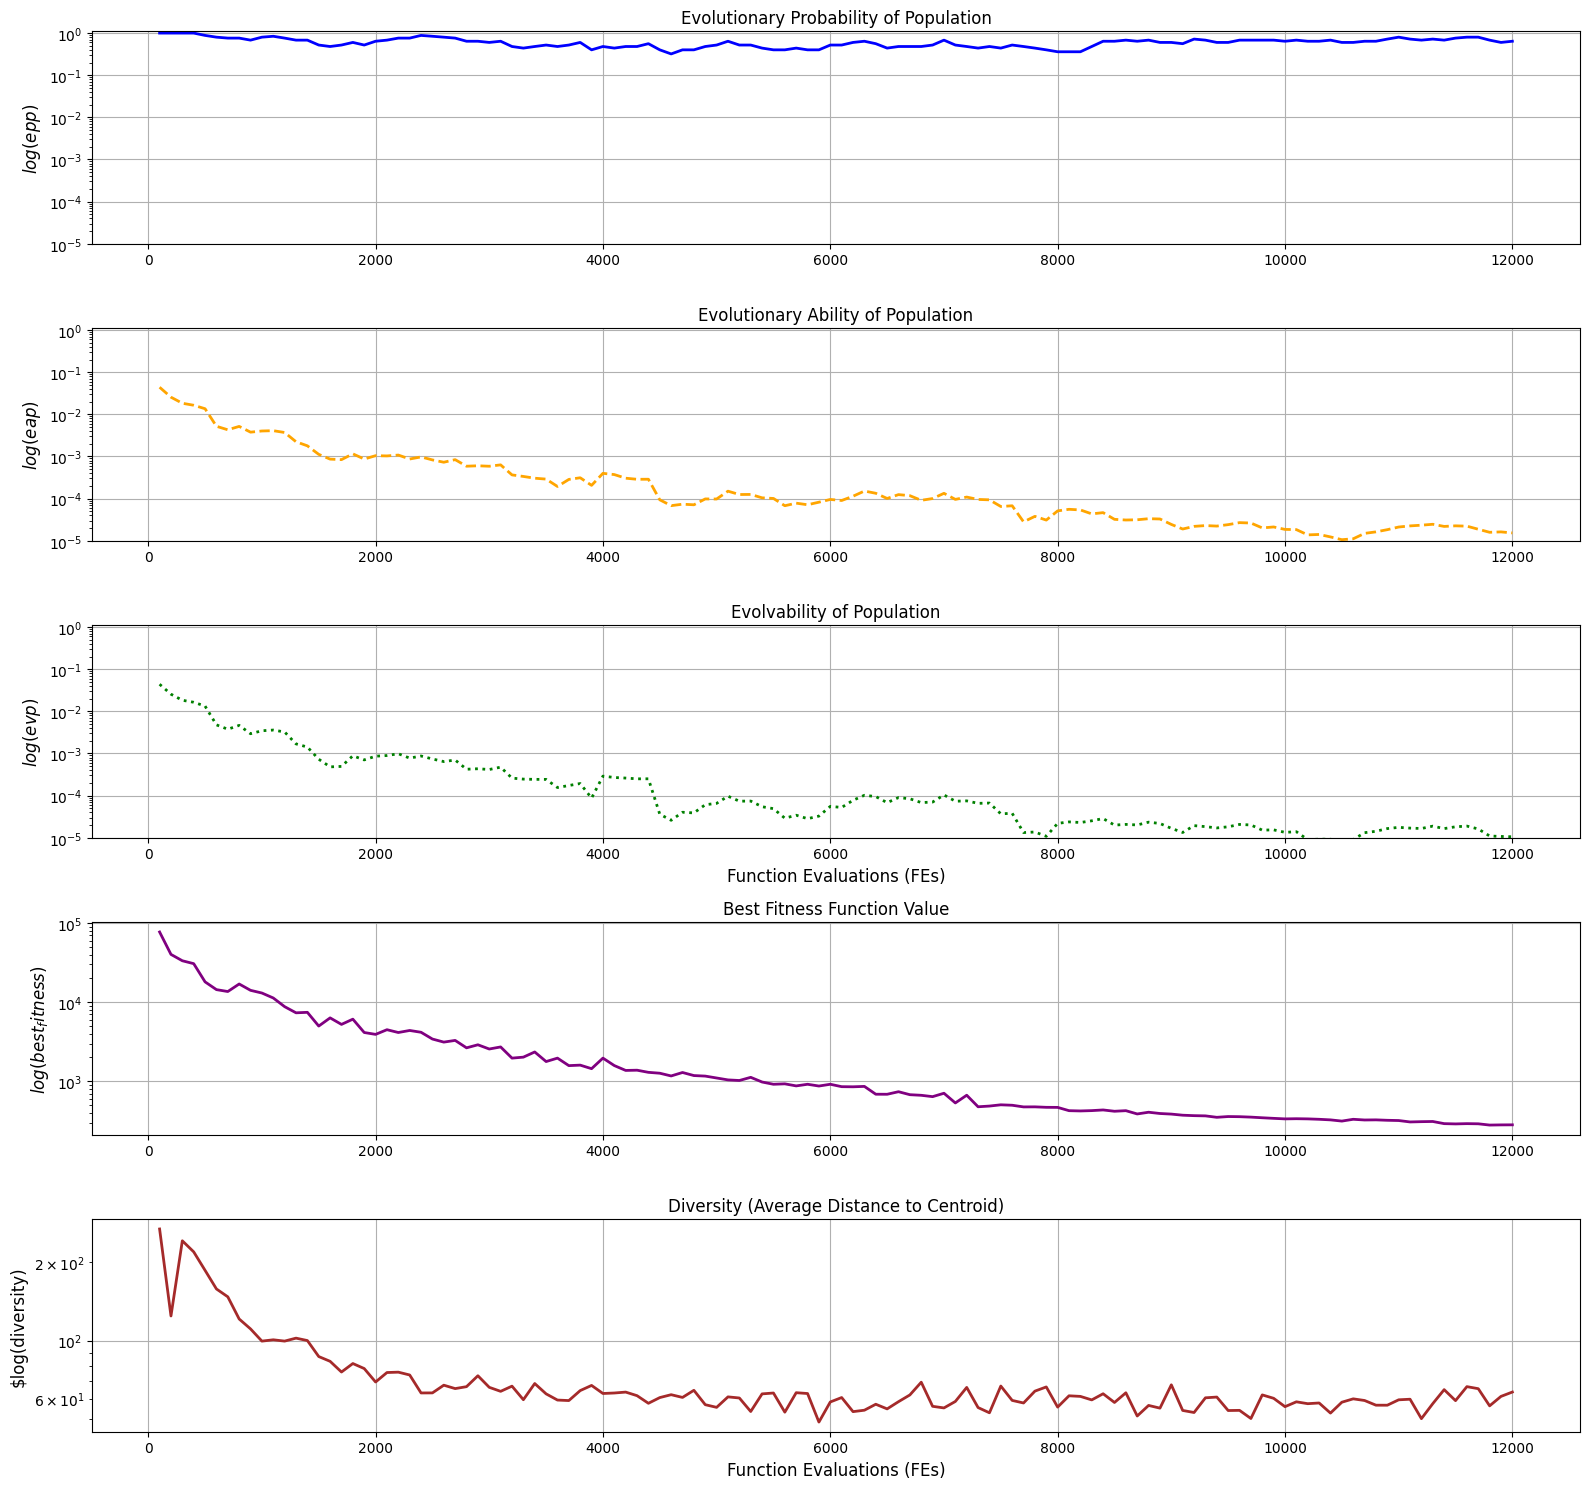

In [48]:
evp_evaluator_for_f3.evaluate(with_plot=True)

#### Score

In [49]:
def get_evaluator():
    ga = GeneticAlgorithm(f1, dim_, mutation_rate, crossover_rate, elite_rate, [lb_, ub_], pop_size_)
    return EvolvabilityOfPopulationEvaluator(ga, maxFEs_, nNeighbours_)

In [50]:
evaluator_score_for_f3 = calculate_evaluator_score(get_evaluator)

100%|██████████| 120/120 [00:02<00:00, 59.09it/s]


In [51]:
evaluator_score_for_f3

best_fitness  mean_best_fitness  std_best_fitness  mean_convergence_speed  \
0    202.657336         346.676809         81.666409                 12000.0   

   std_convergence_speed  
0                    0.0

### Strategy

In [53]:
ga = GeneticAlgorithm(f1, dim_, mutation_rate, crossover_rate, elite_rate, [lb_, ub_], pop_size_)
evp_strategy_for_f3 = EvolvabilityOfPopulationStrategy(ga, maxFEs_, nNeighbours_)

In [54]:
evp_strategy_for_f3.evaluate()

100%|██████████| 120/120 [00:02<00:00, 52.81it/s]


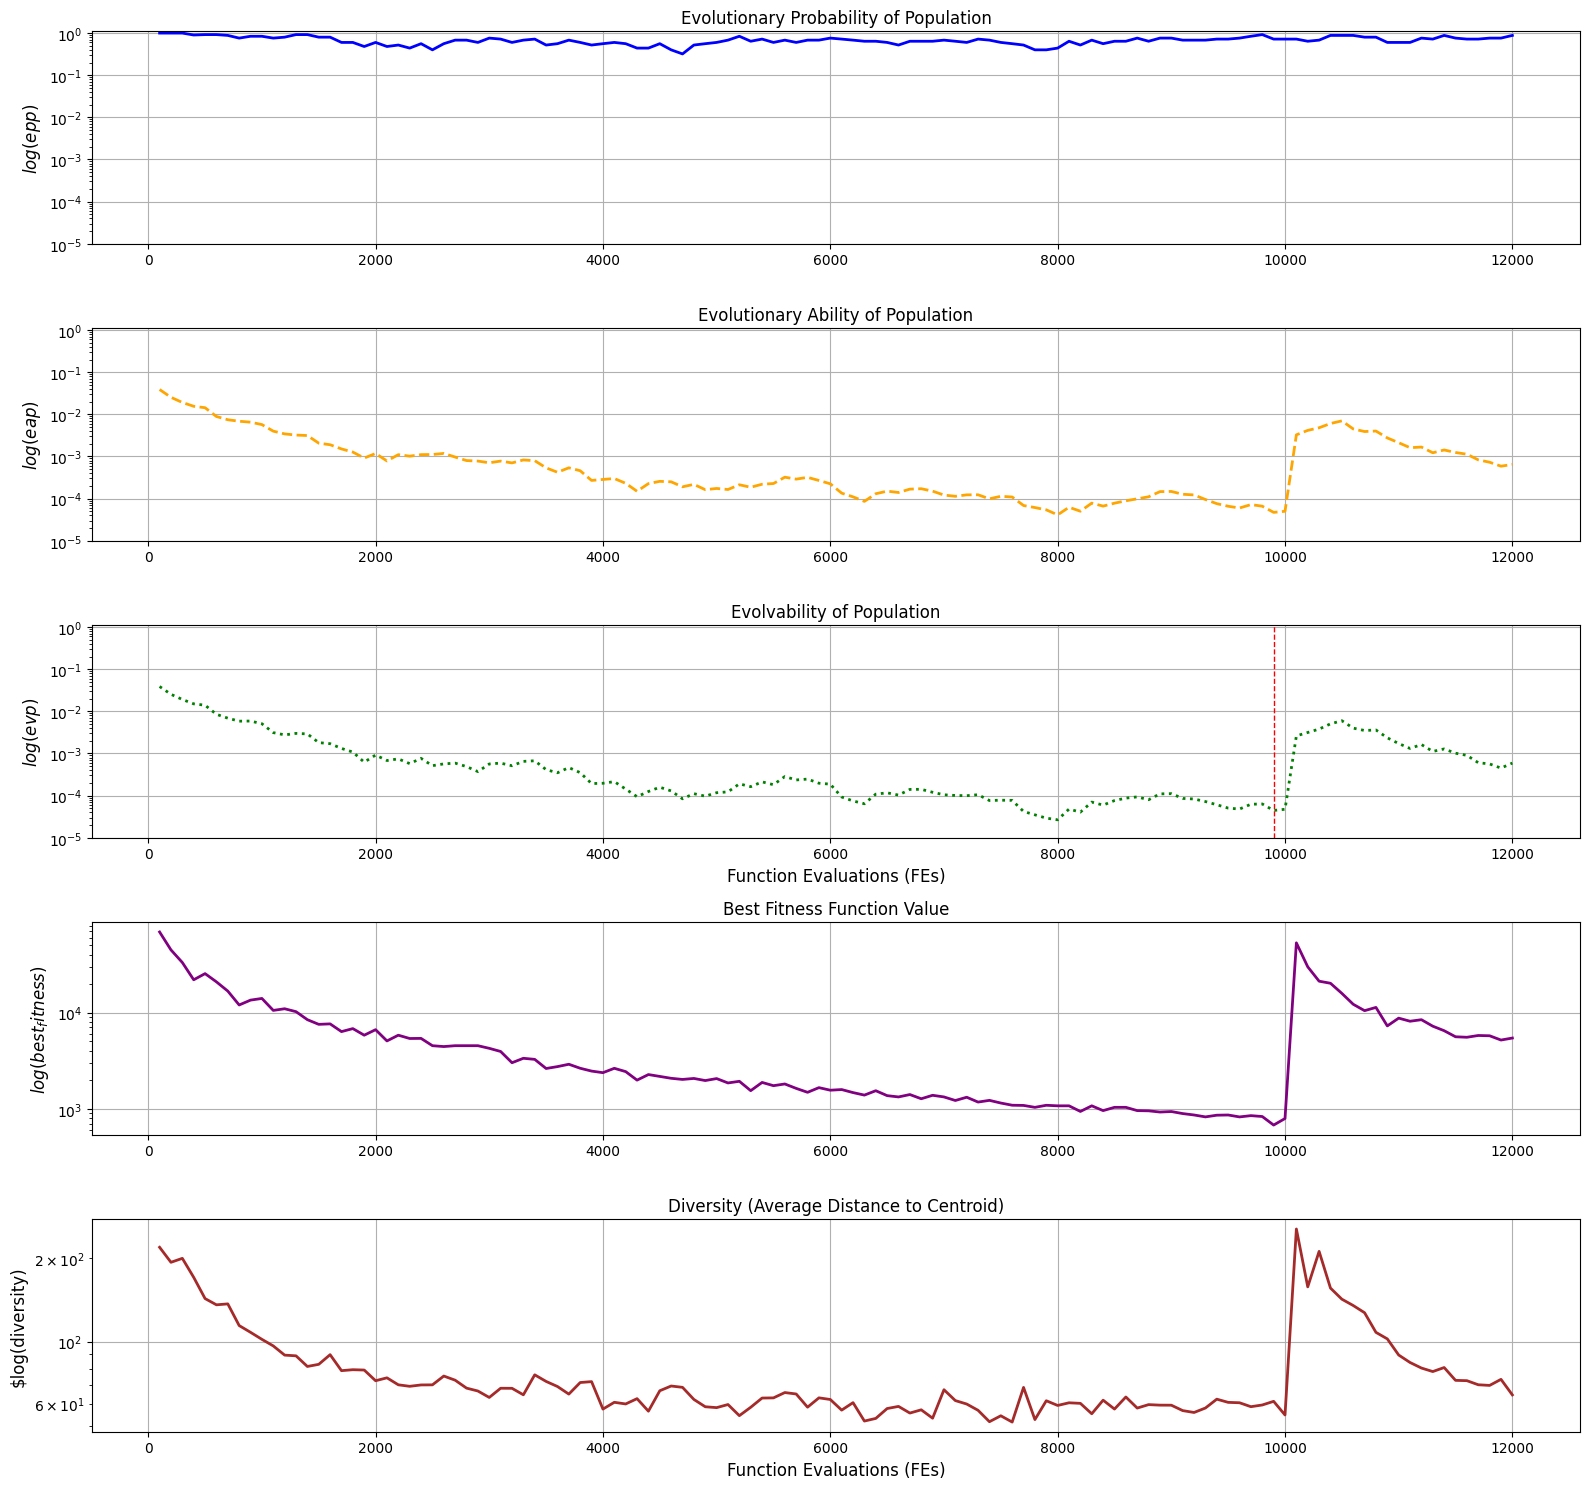

In [55]:
evp_strategy_for_f3.plot_metrics()

#### Score

In [56]:
strategy_score_for_f3 = evp_strategy_for_f3.score()

In [57]:
strategy_score_for_f3

best_fitness  mean_best_fitness  std_best_fitness  \
0    676.255326         676.255326               0.0   

   mean_functions_evaluations  std_functions_evaluations  
0                      9900.0                        0.0

## Step Ellipsoidal Function

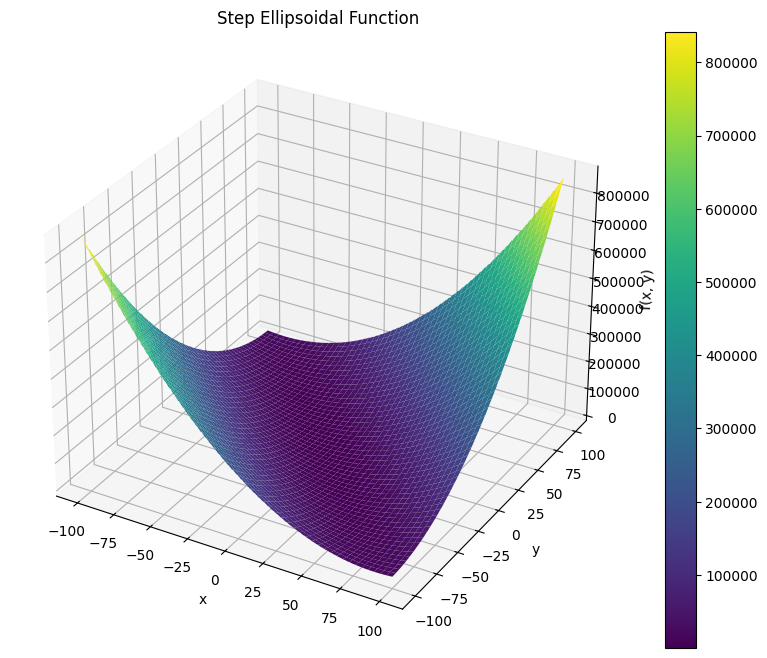

In [58]:
plot_function('Step Ellipsoidal Function', get_problem(7, 1, 2, ProblemClass.BBOB), lb_, ub_)

In [59]:
def f7(x):
    problem = get_problem(7, 1, 30, ProblemClass.BBOB)
    return problem(x)

### Evaluator

In [60]:
ga = GeneticAlgorithm(f1, dim_, mutation_rate, crossover_rate, elite_rate, [lb_, ub_], pop_size_)
evp_evaluator_for_f7 = EvolvabilityOfPopulationEvaluator(ga, maxFEs_, nNeighbours_)

100%|██████████| 120/120 [00:02<00:00, 56.77it/s]


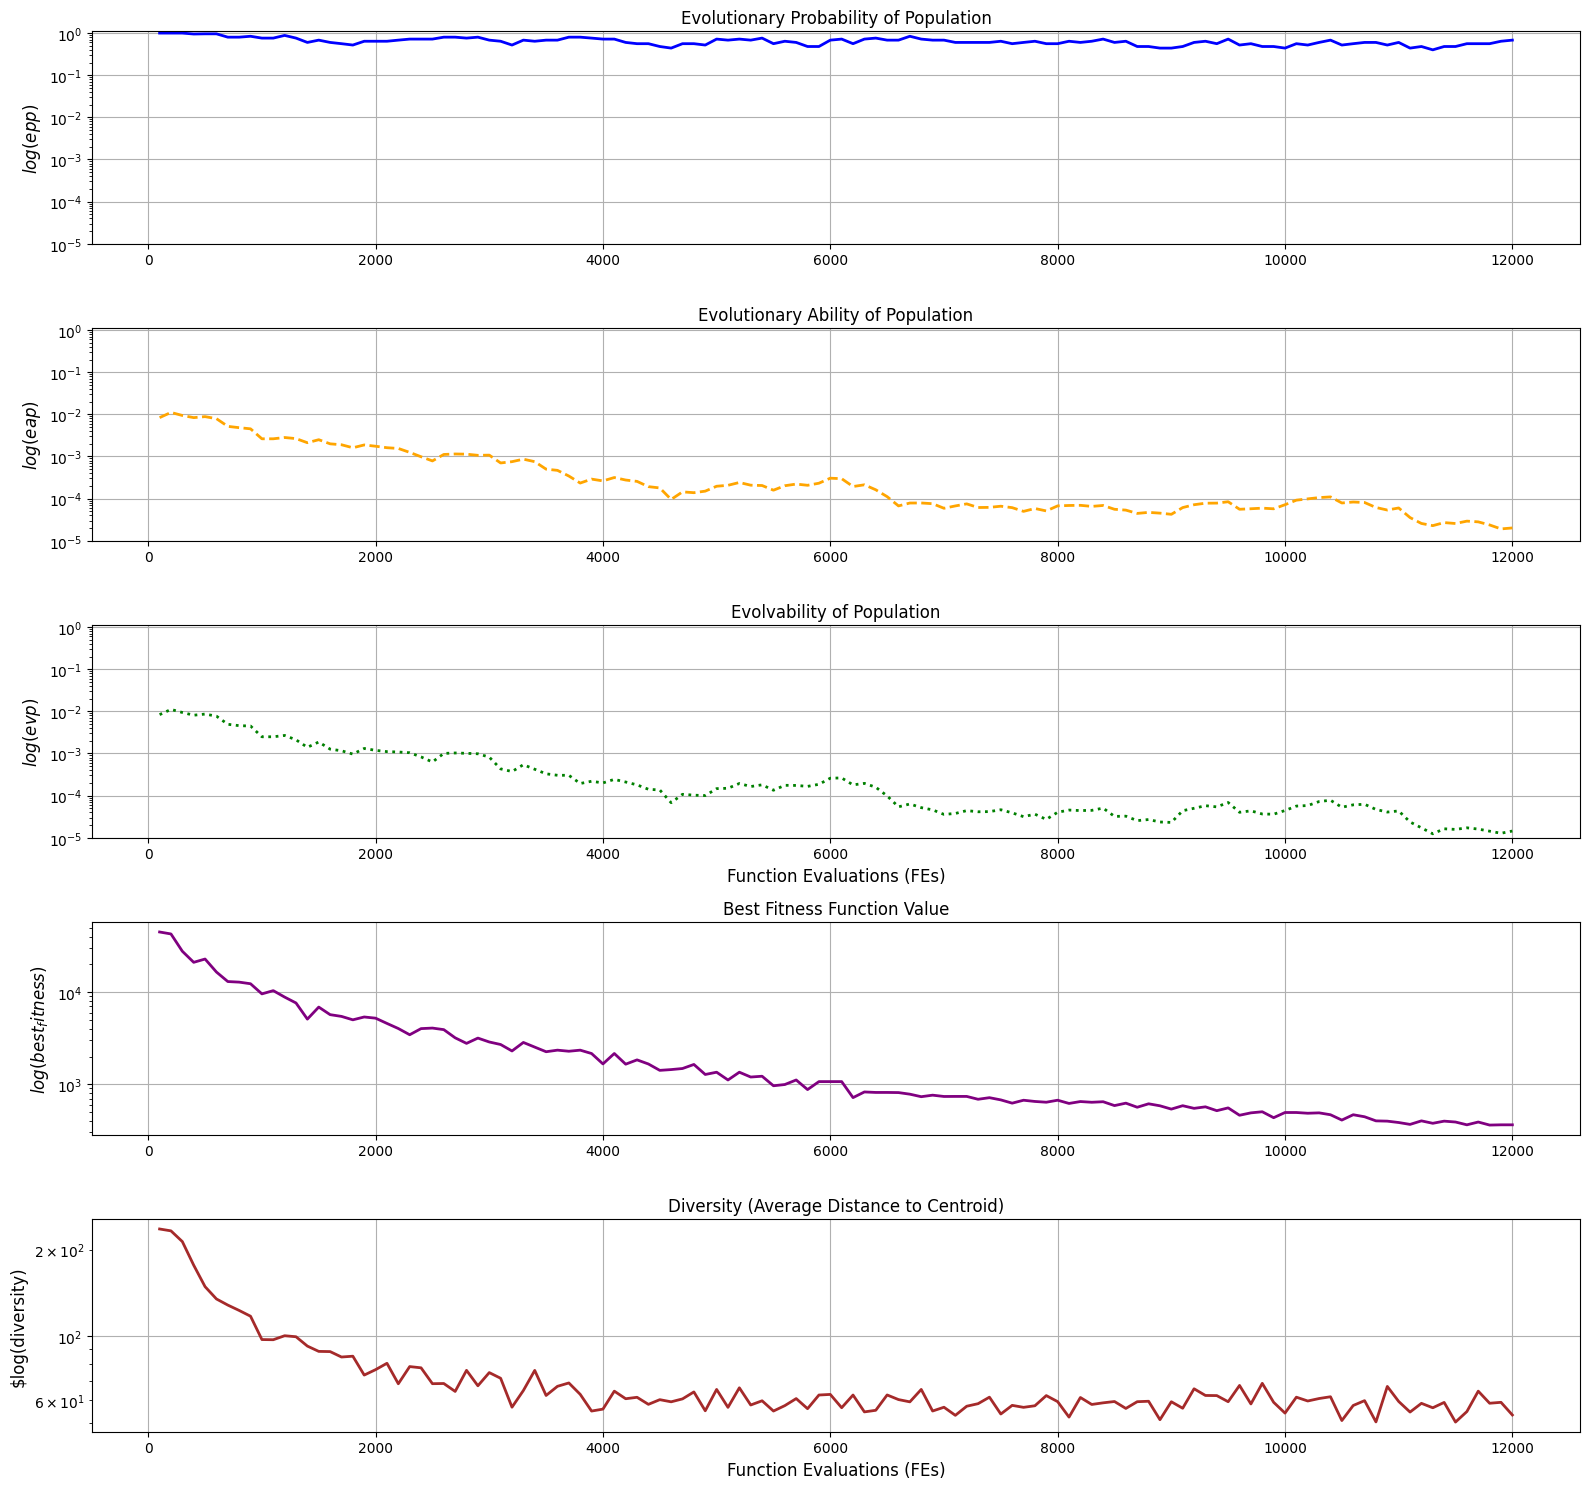

In [61]:
evp_evaluator_for_f7.evaluate(with_plot=True)

#### Score

In [62]:
def get_evaluator():
    ga = GeneticAlgorithm(f1, dim_, mutation_rate, crossover_rate, elite_rate, [lb_, ub_], pop_size_)
    return EvolvabilityOfPopulationEvaluator(ga, maxFEs_, nNeighbours_)

In [63]:
evaluator_score_for_f7 = calculate_evaluator_score(get_evaluator)

100%|██████████| 120/120 [00:02<00:00, 58.84it/s]


In [64]:
evaluator_score_for_f7

best_fitness  mean_best_fitness  std_best_fitness  mean_convergence_speed  \
0    231.881917         361.660164         78.150304                 12000.0   

   std_convergence_speed  
0                    0.0

### Strategy

In [65]:
ga = GeneticAlgorithm(f1, dim_, mutation_rate, crossover_rate, elite_rate, [lb_, ub_], pop_size_)
evp_strategy_for_f7 = EvolvabilityOfPopulationStrategy(ga, maxFEs_, nNeighbours_)

In [66]:
evp_strategy_for_f7.evaluate()

100%|██████████| 120/120 [00:02<00:00, 54.34it/s]


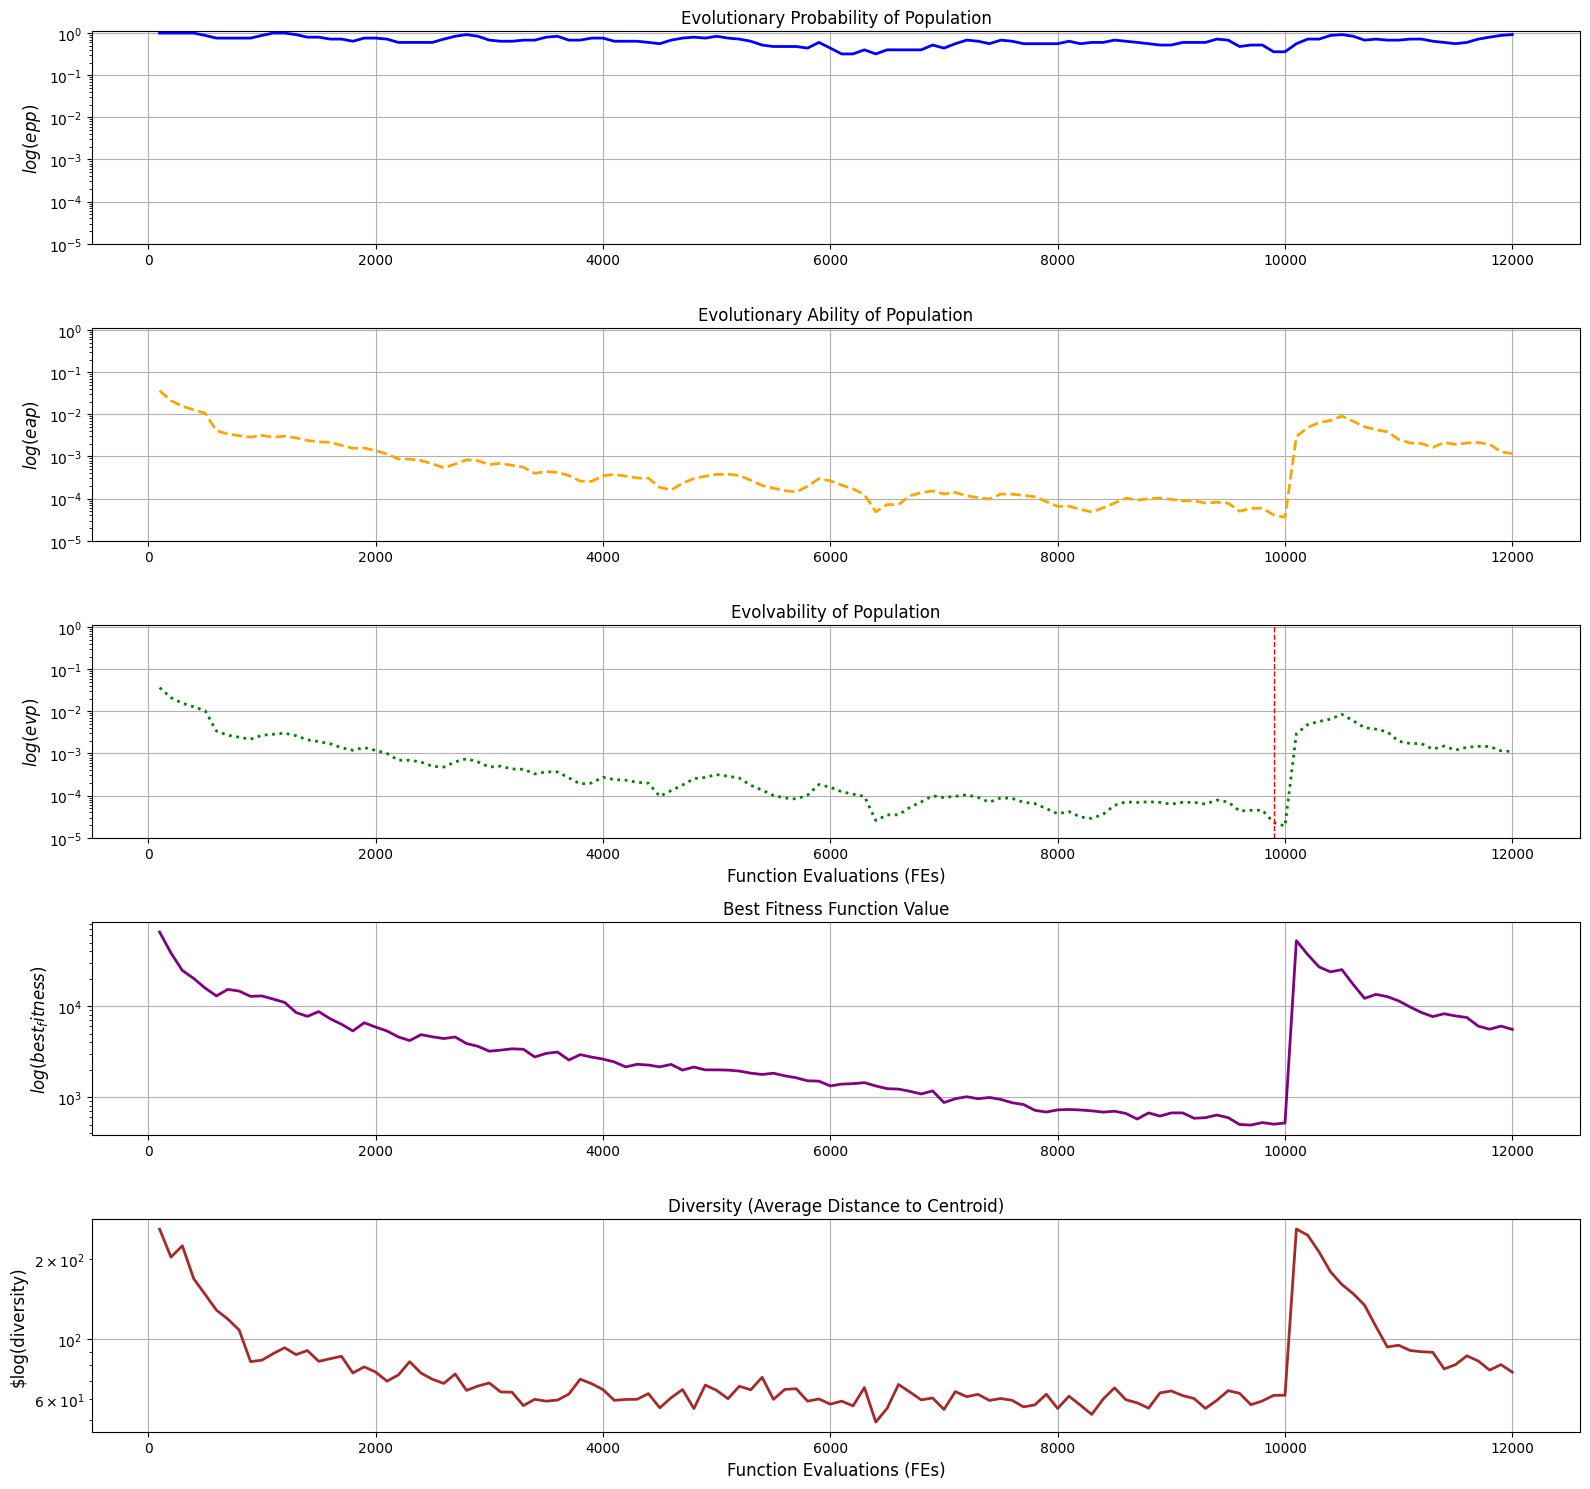

In [67]:
evp_strategy_for_f7.plot_metrics()

#### Score

In [68]:
strategy_score_for_f7 = evp_strategy_for_f7.score()

In [69]:
strategy_score_for_f7

best_fitness  mean_best_fitness  std_best_fitness  \
0    493.265316         493.265316               0.0   

   mean_functions_evaluations  std_functions_evaluations  
0                      9900.0                        0.0

## Bent Cigar Function

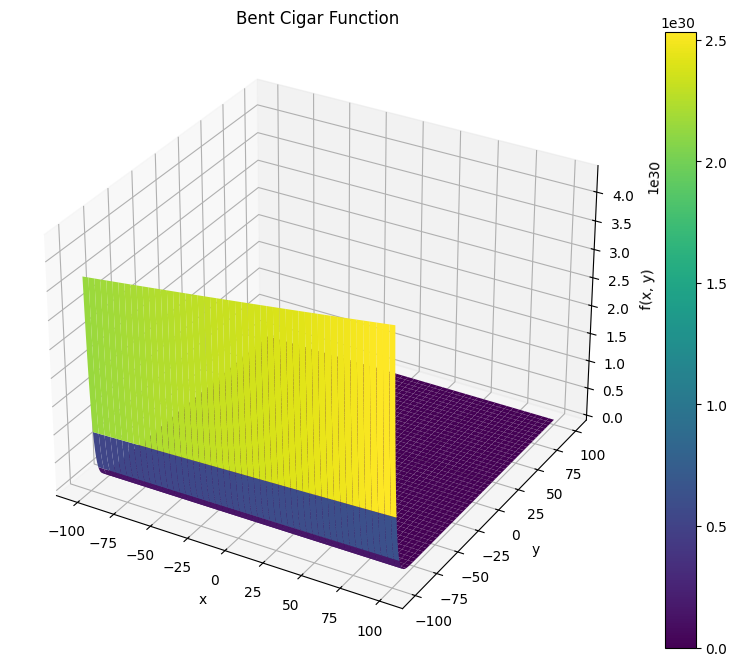

In [70]:
plot_function('Bent Cigar Function', get_problem(12, 1, 2, ProblemClass.BBOB), lb_, ub_)

In [71]:
def f12(x):
    problem = get_problem(12, 1, 30, ProblemClass.BBOB)
    return problem(x)

### Evaluator

In [73]:
ga = GeneticAlgorithm(f1, dim_, mutation_rate, crossover_rate, elite_rate, [lb_, ub_], pop_size_)
evp_evaluator_for_f12 = EvolvabilityOfPopulationEvaluator(ga, maxFEs_, nNeighbours_)

100%|██████████| 120/120 [00:02<00:00, 57.00it/s]


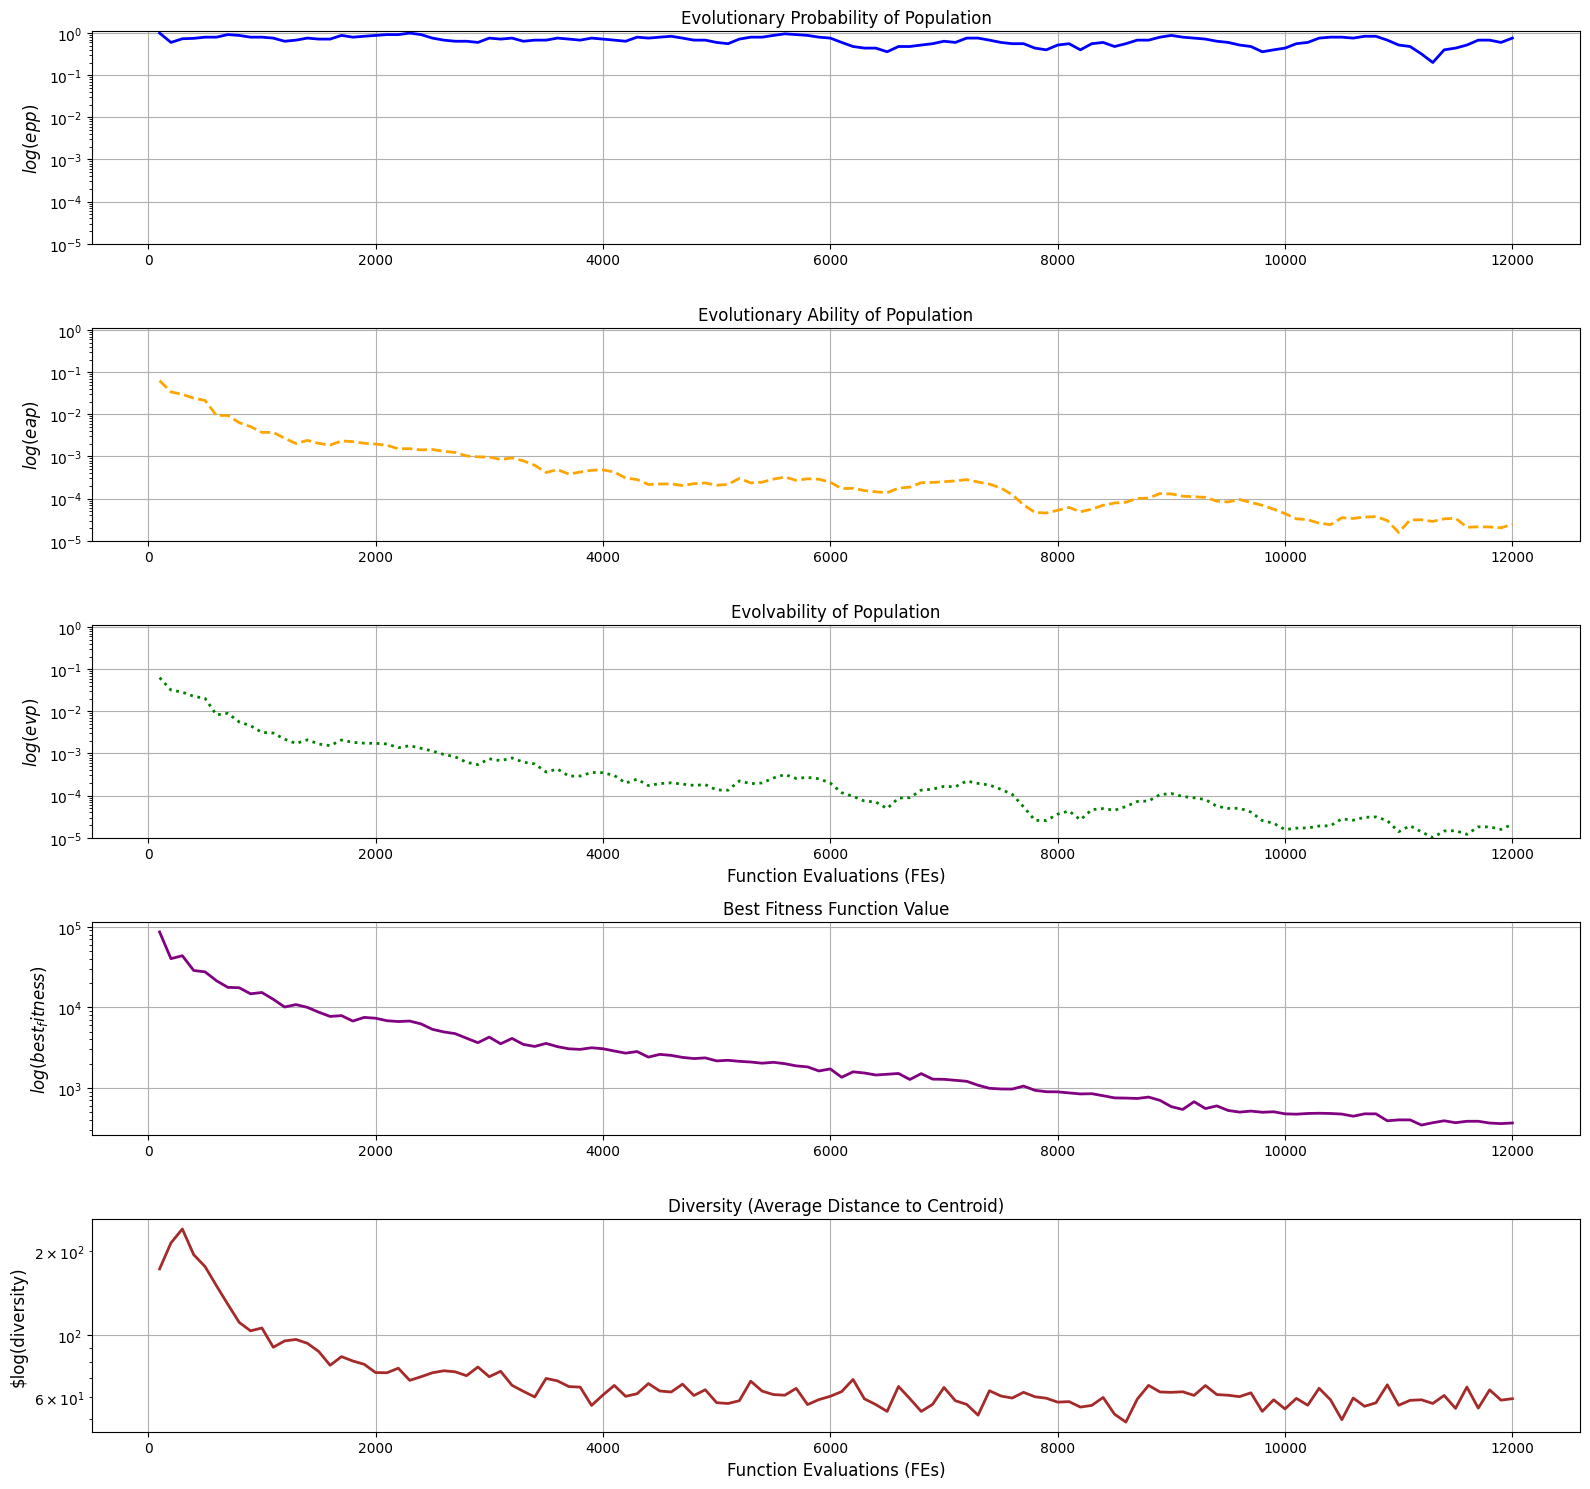

In [74]:
evp_evaluator_for_f12.evaluate(with_plot=True)

#### Score

In [76]:
def get_evaluator():
    ga = GeneticAlgorithm(f1, dim_, mutation_rate, crossover_rate, elite_rate, [lb_, ub_], pop_size_)
    return EvolvabilityOfPopulationEvaluator(ga, maxFEs_, nNeighbours_)

In [77]:
evaluator_score_for_f12 = calculate_evaluator_score(get_evaluator)

100%|██████████| 120/120 [00:02<00:00, 58.63it/s]


In [78]:
evaluator_score_for_f12

best_fitness  mean_best_fitness  std_best_fitness  mean_convergence_speed  \
0     216.24872         339.634699         62.438622                 12000.0   

   std_convergence_speed  
0                    0.0

### Strategy

In [79]:
ga = GeneticAlgorithm(f1, dim_, mutation_rate, crossover_rate, elite_rate, [lb_, ub_], pop_size_)
evp_strategy_for_f12 = EvolvabilityOfPopulationStrategy(ga, maxFEs_, nNeighbours_)

In [80]:
evp_strategy_for_f12.evaluate()

100%|██████████| 120/120 [00:02<00:00, 56.40it/s]


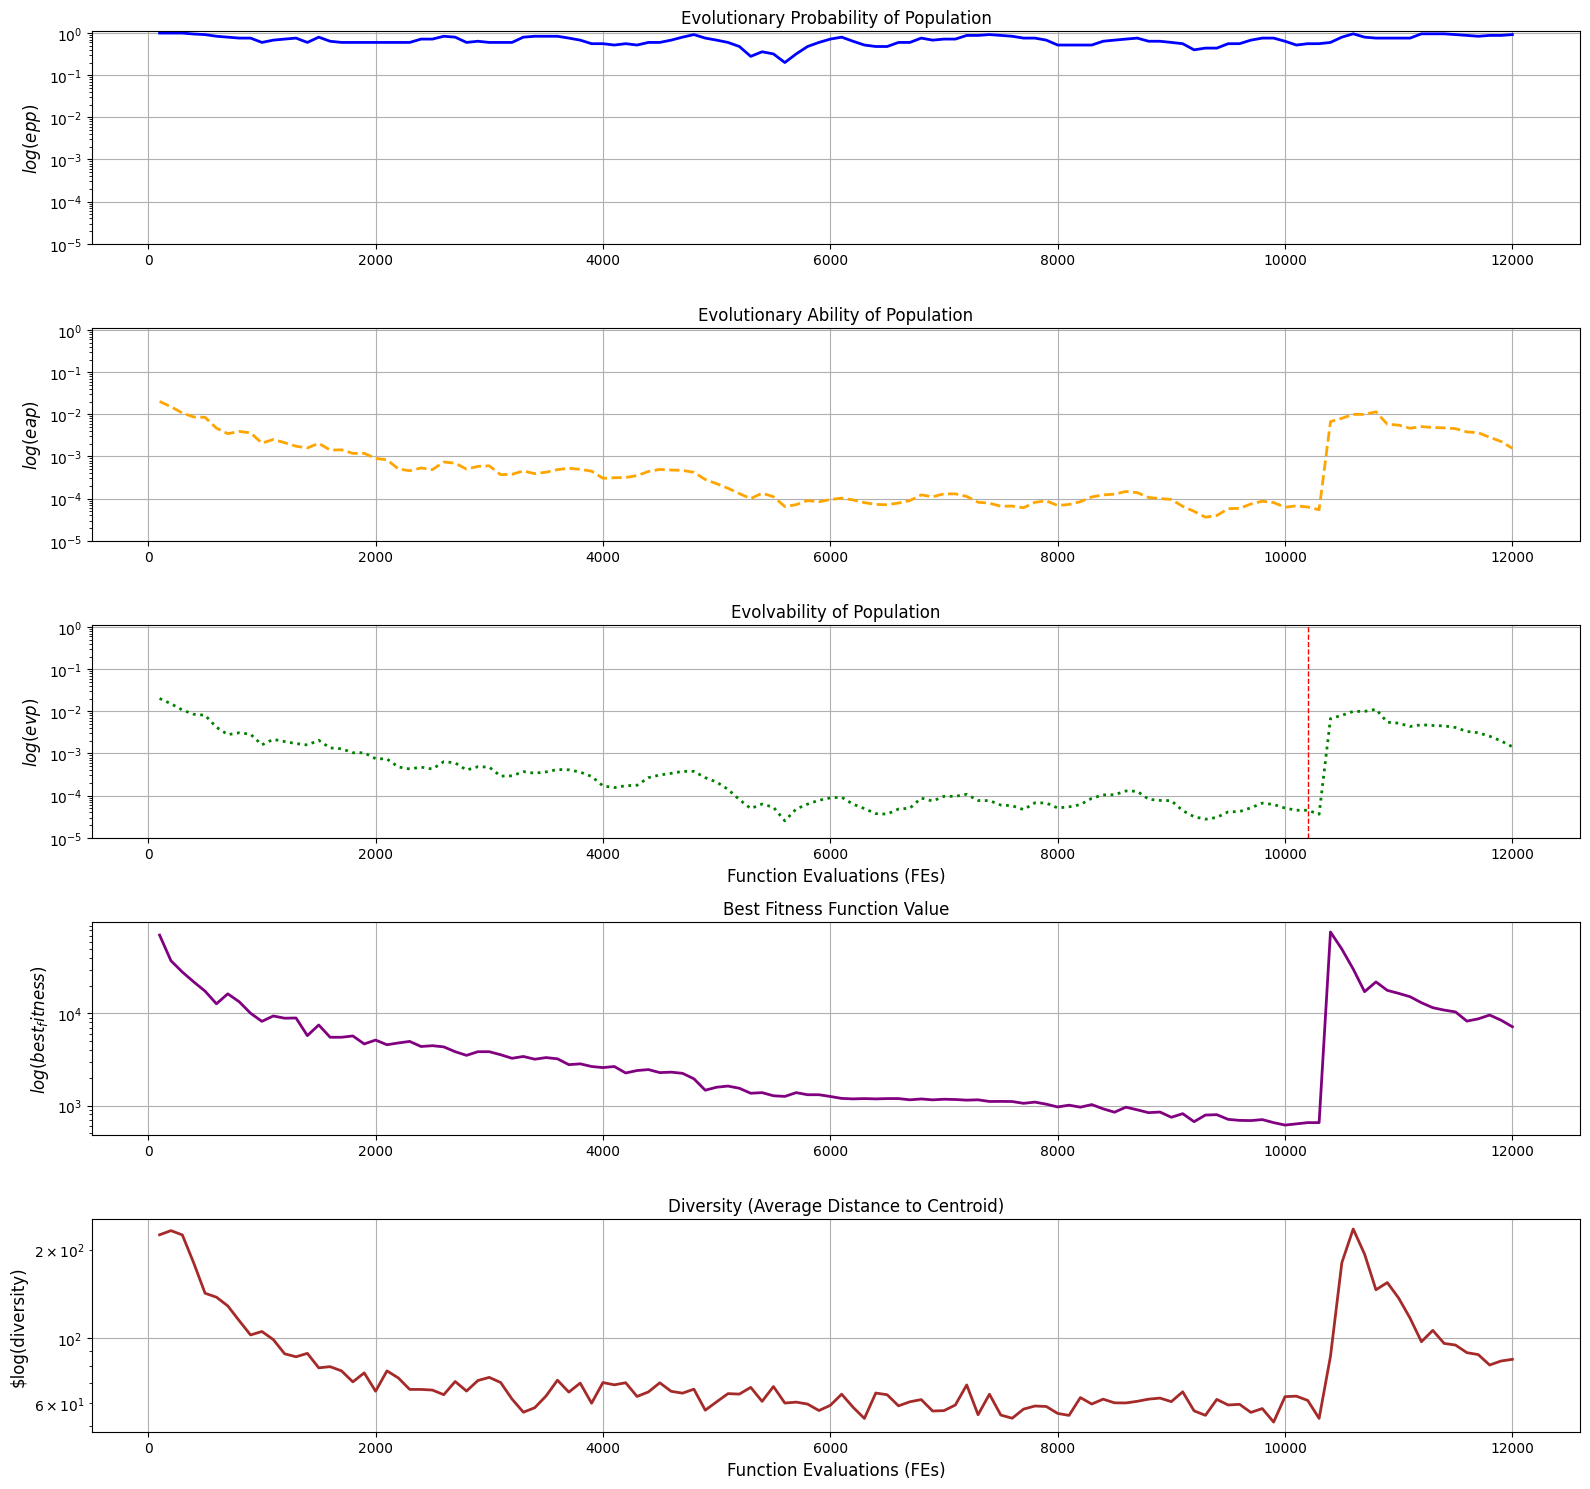

In [81]:
evp_strategy_for_f12.plot_metrics()

#### Score

In [82]:
strategy_score_for_f12 = evp_strategy_for_f12.score()

In [83]:
strategy_score_for_f12

best_fitness  mean_best_fitness  std_best_fitness  \
0    613.398693         613.398693               0.0   

   mean_functions_evaluations  std_functions_evaluations  
0                     10200.0                        0.0

## Comparison

In [88]:
results = [
    ('evaluator_score_for_f1', evaluator_score_for_f1),
    ('strategy_score_for_f1', strategy_score_for_f1),
    ('evaluator_score_for_f20', evaluator_score_for_f20),
    ('strategy_score_for_f20', strategy_score_for_f20),
    ('evaluator_score_for_radar', evaluator_score_for_radar),
    ('strategy_score_for_radar', strategy_score_for_radar),
    ('evaluator_score_for_f3', evaluator_score_for_f3),
    ('strategy_score_for_f3', strategy_score_for_f3),
    ('evaluator_score_for_f7', evaluator_score_for_f7),
    ('strategy_score_for_f7', strategy_score_for_f7),
    ('evaluator_score_for_f12', evaluator_score_for_f12),
    ('strategy_score_for_f12', strategy_score_for_f12),
]

for name, df in results:
    df['name'] = name

result = pd.concat([df for _, df in results], ignore_index=True)

result.set_index('name', inplace=True)

In [89]:
result

best_fitness  mean_best_fitness  std_best_fitness  \
name                                                                           
evaluator_score_for_f1       235.138310         341.839431         65.871572   
strategy_score_for_f1        408.510975         408.510975          0.000000   
evaluator_score_for_f20      240.905975         364.326843         89.306394   
strategy_score_for_f20       452.823727         452.823727          0.000000   
evaluator_score_for_radar    322.895444         345.128539         17.351705   
strategy_score_for_radar     509.030786         509.030786          0.000000   
evaluator_score_for_f3       202.657336         346.676809         81.666409   
strategy_score_for_f3        676.255326         676.255326          0.000000   
evaluator_score_for_f7       231.881917         361.660164         78.150304   
strategy_score_for_f7        493.265316         493.265316          0.000000   
evaluator_score_for_f12      216.248720         339.634699         62.438622   
strategy_score_for_f12       613.398693         613.398693          0.000000   

                           mean_convergence_speed  std_convergence_speed  \
name                                                                       
evaluator_score_for_f1                    12000.0                    0.0   
strategy_score_for_f1                         NaN                    NaN   
evaluator_score_for_f20                   12000.0                    0.0   
strategy_score_for_f20                        NaN                    NaN   
evaluator_score_for_radar                 12000.0                    0.0   
strategy_score_for_radar                      NaN                    NaN   
evaluator_score_for_f3                    12000.0                    0.0   
strategy_score_for_f3                         NaN                    NaN   
evaluator_score_for_f7                    12000.0                    0.0   
strategy_score_for_f7                         NaN                    NaN   
evaluator_score_for_f12                   12000.0                    0.0   
strategy_score_for_f12                        NaN                    NaN   

                           mean_functions_evaluations  \
name                                                    
evaluator_score_for_f1                            NaN   
strategy_score_for_f1                          9900.0   
evaluator_score_for_f20                           NaN   
strategy_score_for_f20                         9900.0   
evaluator_score_for_radar                         NaN   
strategy_score_for_radar                      10000.0   
evaluator_score_for_f3                            NaN   
strategy_score_for_f3                          9900.0   
evaluator_score_for_f7                            NaN   
strategy_score_for_f7                          9900.0   
evaluator_score_for_f12                           NaN   
strategy_score_for_f12                        10200.0   

                           std_functions_evaluations  
name                                                  
evaluator_score_for_f1                           NaN  
strategy_score_for_f1                            0.0  
evaluator_score_for_f20                          NaN  
strategy_score_for_f20                           0.0  
evaluator_score_for_radar                        NaN  
strategy_score_for_radar                         0.0  
evaluator_score_for_f3                           NaN  
strategy_score_for_f3                            0.0  
evaluator_score_for_f7                           NaN  
strategy_score_for_f7                            0.0  
evaluator_score_for_f12                          NaN  
strategy_score_for_f12                           0.0

Save result

In [90]:
result.to_pickle('results/ga.pkl')

## Fix result

In [2]:
result = pd.read_pickle('results/ga.pkl')

result.loc[result['mean_convergence_speed'].isnull(), 'mean_convergence_speed'] = result['mean_functions_evaluations']
result.loc[result['std_convergence_speed'].isnull(), 'std_convergence_speed'] = result['std_functions_evaluations']

result.drop(columns=['mean_functions_evaluations', 'std_functions_evaluations'], inplace=True)

result

best_fitness  mean_best_fitness  std_best_fitness  \
name                                                                           
evaluator_score_for_f1       235.138310         341.839431         65.871572   
strategy_score_for_f1        408.510975         408.510975          0.000000   
evaluator_score_for_f20      240.905975         364.326843         89.306394   
strategy_score_for_f20       452.823727         452.823727          0.000000   
evaluator_score_for_radar    322.895444         345.128539         17.351705   
strategy_score_for_radar     509.030786         509.030786          0.000000   
evaluator_score_for_f3       202.657336         346.676809         81.666409   
strategy_score_for_f3        676.255326         676.255326          0.000000   
evaluator_score_for_f7       231.881917         361.660164         78.150304   
strategy_score_for_f7        493.265316         493.265316          0.000000   
evaluator_score_for_f12      216.248720         339.634699         62.438622   
strategy_score_for_f12       613.398693         613.398693          0.000000   

                           mean_convergence_speed  std_convergence_speed  
name                                                                      
evaluator_score_for_f1                    12000.0                    0.0  
strategy_score_for_f1                      9900.0                    0.0  
evaluator_score_for_f20                   12000.0                    0.0  
strategy_score_for_f20                     9900.0                    0.0  
evaluator_score_for_radar                 12000.0                    0.0  
strategy_score_for_radar                  10000.0                    0.0  
evaluator_score_for_f3                    12000.0                    0.0  
strategy_score_for_f3                      9900.0                    0.0  
evaluator_score_for_f7                    12000.0                    0.0  
strategy_score_for_f7                      9900.0                    0.0  
evaluator_score_for_f12                   12000.0                    0.0  
strategy_score_for_f12                    10200.0                    0.0

In [3]:
result.to_pickle('results/ga.pkl')